# Step 1: Business case - Predict whether a client subscribe a term deposit or not.

This is about a direct marketing campaigns of a Portuguese banking institution. Here our goal is to predict if the client will subscribe a term deposit (variable y) or not, so it is a classification problem.

## Domain Analysis:

**Client may select term deposit because**
- Fixed rate of interest: The rate of interest for term deposits are fixed and are not subject to fluctuations in the market.
- It’s low risk: A term deposit ensures your money will earn interest at a fixed rate, for a fixed term. There’s little       to no chance of losing your money, so it’s a good option for cautious savers.
- It’s low maintenance: Once you lock your cash away in a term deposit, there’s not a lot you can do with it until the       term is up. So it makes for a great out-of-sight-out-of-mind saving plan.
- No service or startup fees: One of the best things about a term deposit is that as long as you don’t withdraw early,       it’s entirely fee-free.
- Protected from slumps in the market: The fixed interest rate on a term deposit means that even if market interest           rates are falling a mile a minute, your savings will keep earning the same level of interest.
- Impulse spending control: Are you a bit of an impulse spender? Once your money is in a term deposit, hefty penalties       apply for taking it out early, so it can actually help to curb bad spending habits.

**Client may not select term deposite because**
- Your money isn’t accessible: The number one term deposit rule is that once your money is locked away, it’s hands off       until the term ends. If you need to withdraw your money from a term deposit early, you’ll wind up paying a penalty         fee, plus your interest rate will be reduced.
- No extra deposits: You’ll need to make a lump sum deposit when you open your term deposit, and there’s no option to         add to your savings as you go. This might be a hassle for regular savers, but one way to combat it is by having             multiple term deposits with staggered maturity dates.
- Less flexibility: A term deposit is low risk – but the flip side is that it’s not a very flexible savings option.           Other products with comparable rates, such as savings accounts, offer much more in terms of flexible features and           options.
- Rollover terms are often less competitive: If you forget to make plans for your money after your term deposit               matures, it could roll over into another term. This rollover term often comes with a rock-bottom interest rate             attached, and you’ll have to pay the early withdrawal penalty to get out of it.
- Won’t benefit from rises in market. Your fixed interest rate may not look so hot if market interest rates rise and         your savings are left behind in the dust.

# Step 2 : Data Collection

Descreiption about data set and more details will be at 'http://archive.ics.uci.edu/ml/datasets/Bank+Marketing#'.

In [1]:
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('bank-full.csv',';')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Step 3 : Identifying the independent and dependent variable.

## Input variables:
**bank client data:**  
  - 1 - age (numeric)
  - 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
        "blue-collar","self-employed","retired","technician","services") 
  - 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
  - 4 - education (categorical: "unknown","secondary","primary","tertiary")
  - 5 - default: has credit in default? (binary: "yes","no")
  - 6 - balance: average yearly balance, in euros (numeric) 
  - 7 - housing: has housing loan? (binary: "yes","no")
  - 8 - loan: has personal loan? (binary: "yes","no")
   
**related with the last contact of the current campaign:**
  - 9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  - 10 - day: last contact day of the month (numeric)
  - 11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  - 12 - duration: last contact duration, in seconds (numeric)
  
**other attributes:**
  - 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  - 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1              means client was not previously contacted)
  - 15 - previous: number of contacts performed before this campaign and for this client (numeric)
  - 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

## Output variable (desired target):
  - 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

# Step 4 : EDA

## Basic checks:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [5]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
data.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [3]:
# categorical features list
cat_feat = [feat for feat in data.columns if data[feat].dtype == 'object']
cat_feat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'y']

In [8]:
for i in cat_feat:
    print(data[i].value_counts(),'\n')

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64 

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64 

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64 

no     44396
yes      815
Name: default, dtype: int64 

yes    25130
no     20081
Name: housing, dtype: int64 

no     37967
yes     7244
Name: loan, dtype: int64 

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64 

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64 

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome

In [4]:
# numerical features list
num_feat = [feat for feat in data.columns if data[feat].dtype != 'object']
num_feat

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [5]:
import matplotlib.pyplot as plt
import seaborn as sb
import sweetviz as sv

## Univariate analysis:

In [6]:
data_report = sv.analyze(data)
data_report.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### univariate for categorical feature

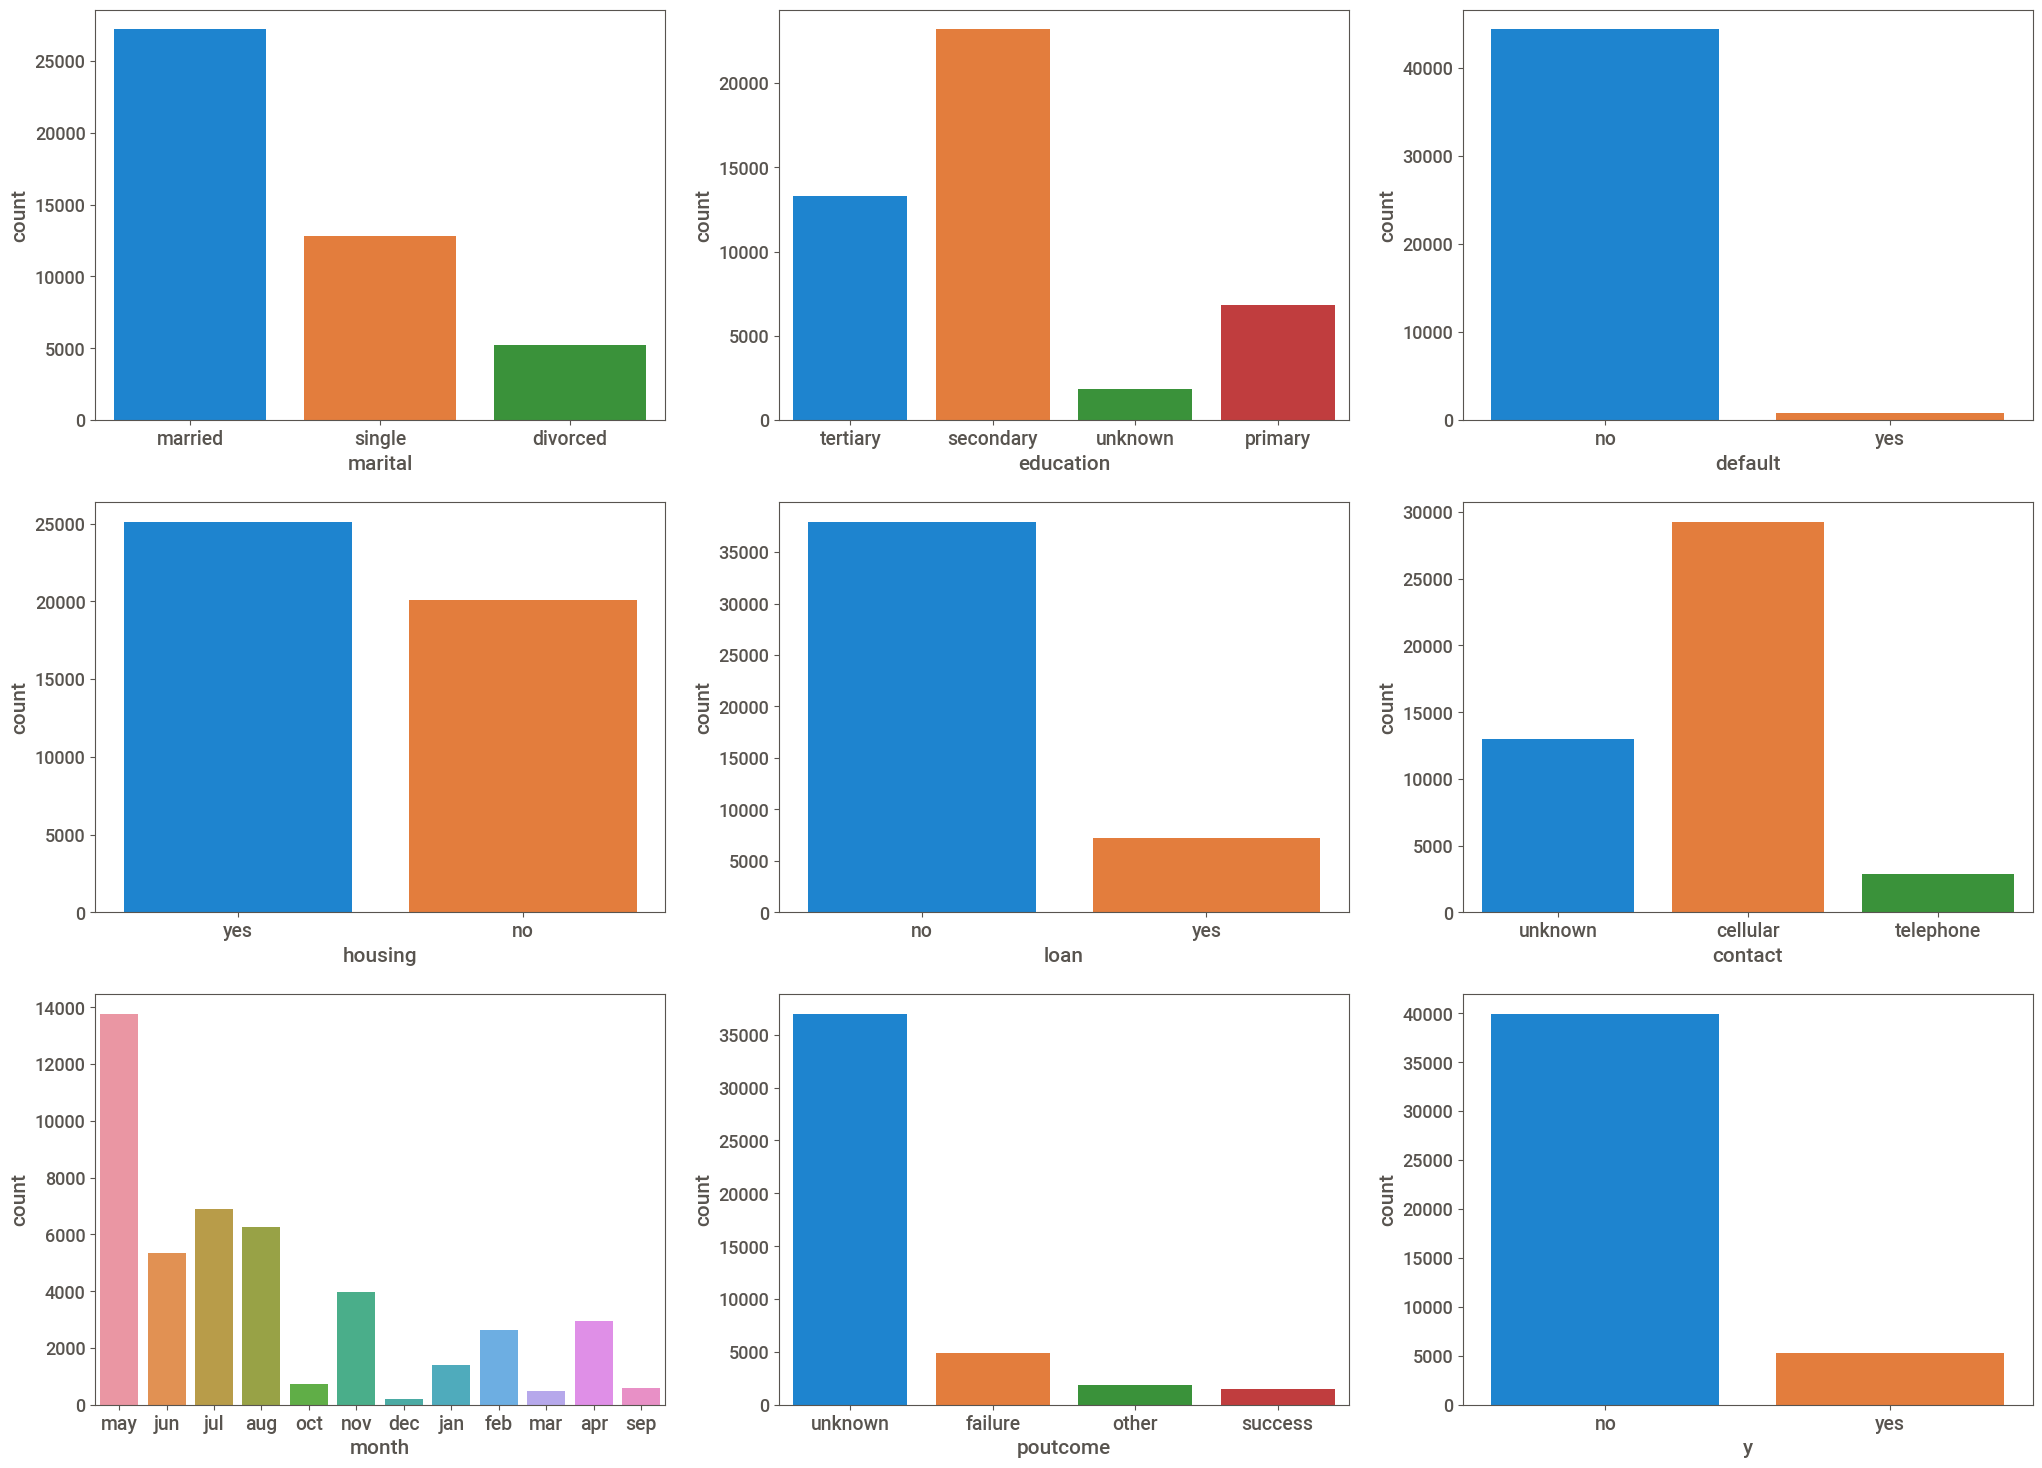

In [12]:
plt.figure(figsize=(25,25), facecolor='white')
plt_num = 1

for cat in cat_feat[1:]:
    if plt_num <= len(cat_feat):
        plt.subplot(4,3,plt_num)
        sb.countplot(x=cat, data=data)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=13)
        plt.xlabel(cat, fontsize=15)
        plt.ylabel('count', fontsize=15)
    plt_num+=1
plt.show()   

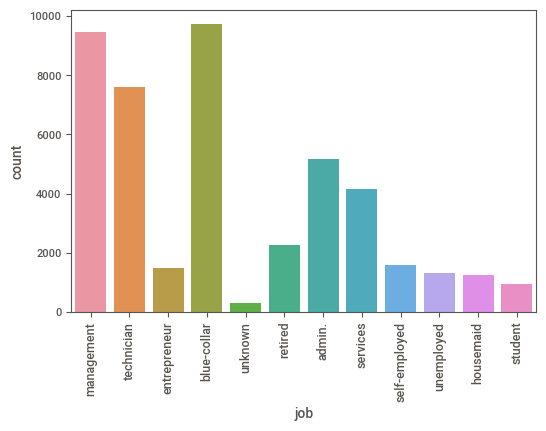

In [13]:
sb.countplot(x=cat_feat[0], data=data)
plt.xticks(rotation=90, fontsize=9)
plt.show()

In [14]:
data.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


**Insights from categorical univariate plot:**
- most of clients(60%) are married and few are diverced(12%) or widowed.
- most of the clients(51%) have Secondary education and education of 4% individuals are unknown.
- only few clients(2%) are there having default credit in account.
- 56% of clients taken house loan.
- only 16% are taken personal loan.
- clients are mainly contacted with cellular type(65%), and contact type of 29% are unknown.
- last contact month of clients with bank in a year is mainly May(30%), and December has minimum contact(<1%).
- most of the results of clients(82%) of the previous marketing campaign are unknown and only 3% of clients are chosen
  term deposit. 
- out of total only 12% of clients are currently chosen term deposit.
- comparitively, clients with blue-collar job type are more(22%) then have management type job. Few(2%) clients are
  student, job type of few clients(<1%) are unknown.

### univariate for numerical features

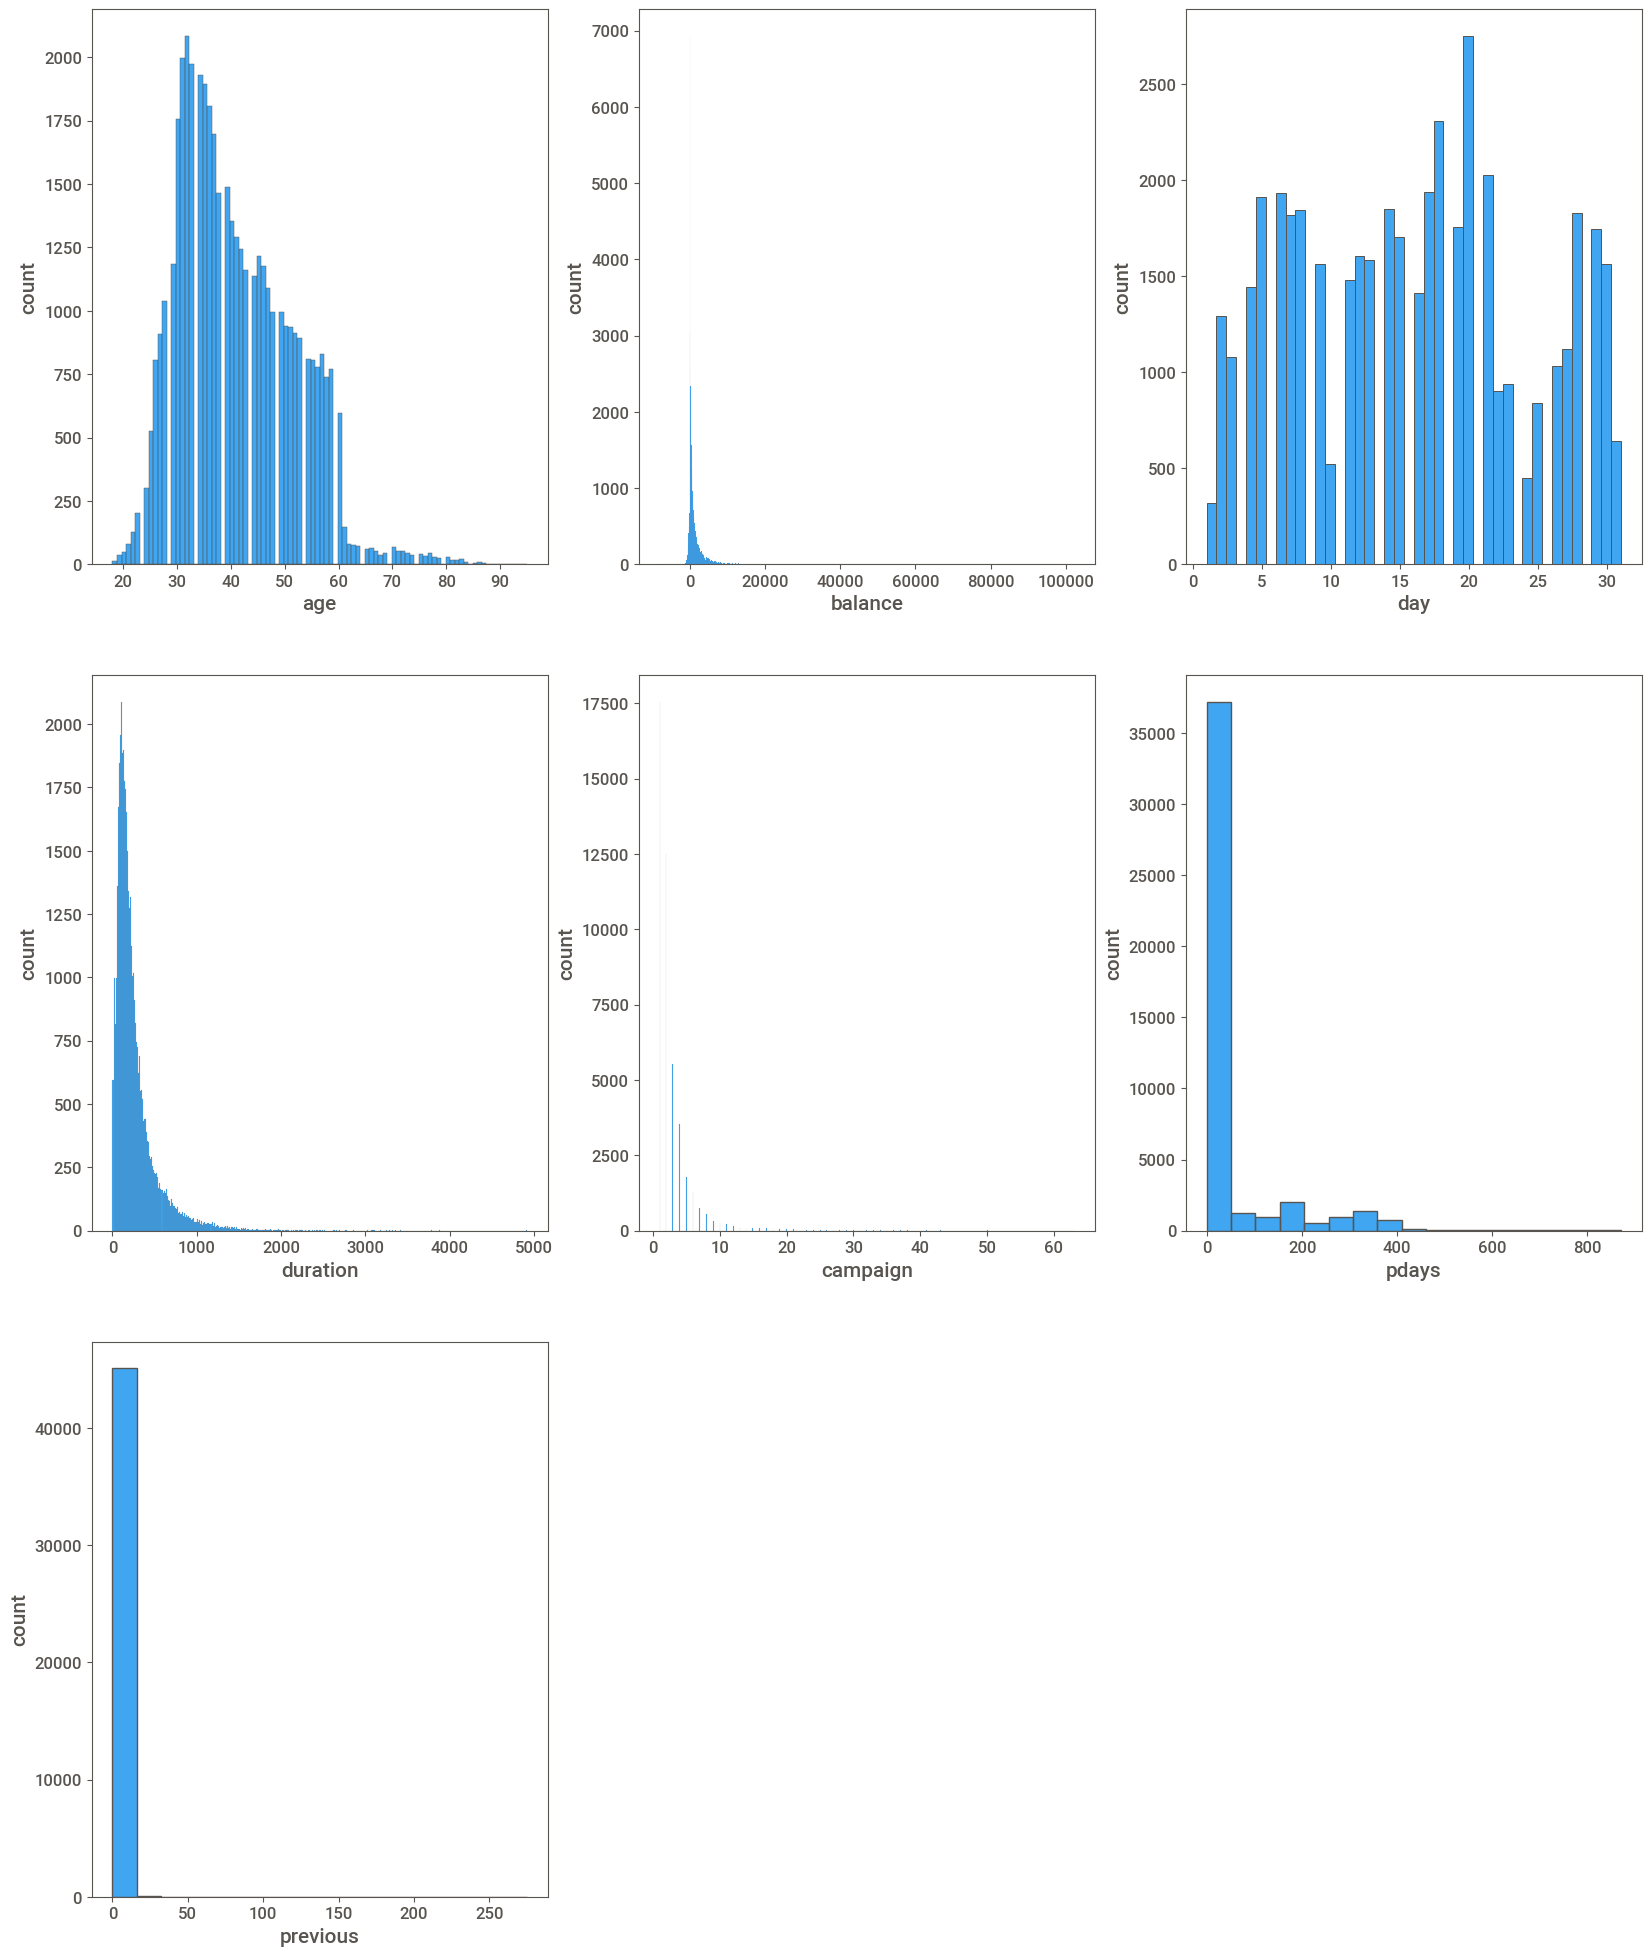

In [15]:
plt.figure(figsize=(20, 25))
plt_num = 1

for feat in num_feat:
    if plt_num <= len(num_feat):
        plt.subplot(3,3,plt_num)
        sb.histplot(x=feat, data=data)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.xlabel(feat, fontsize=15)
        plt.ylabel('count', fontsize=15)
    plt_num+=1
plt.show()

In [16]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


**Important insights from numerical univariate plot**
- 'age' and 'days' features distribution seems like norrmally distributed
- there are clients having negative account.
- feature 'previous' has zero values, means there are clients that never contacted before starting this campign.
- feature 'duration'(contact duration) also have zero values.
- features 'balance', 'duration', 'campaign', 'pdays' and 'previous' are heavily skewed towards right, seems to have   some outliers.

## Bivariate analysis:

### bivariate plot of categorical feature with reference to output 'y'

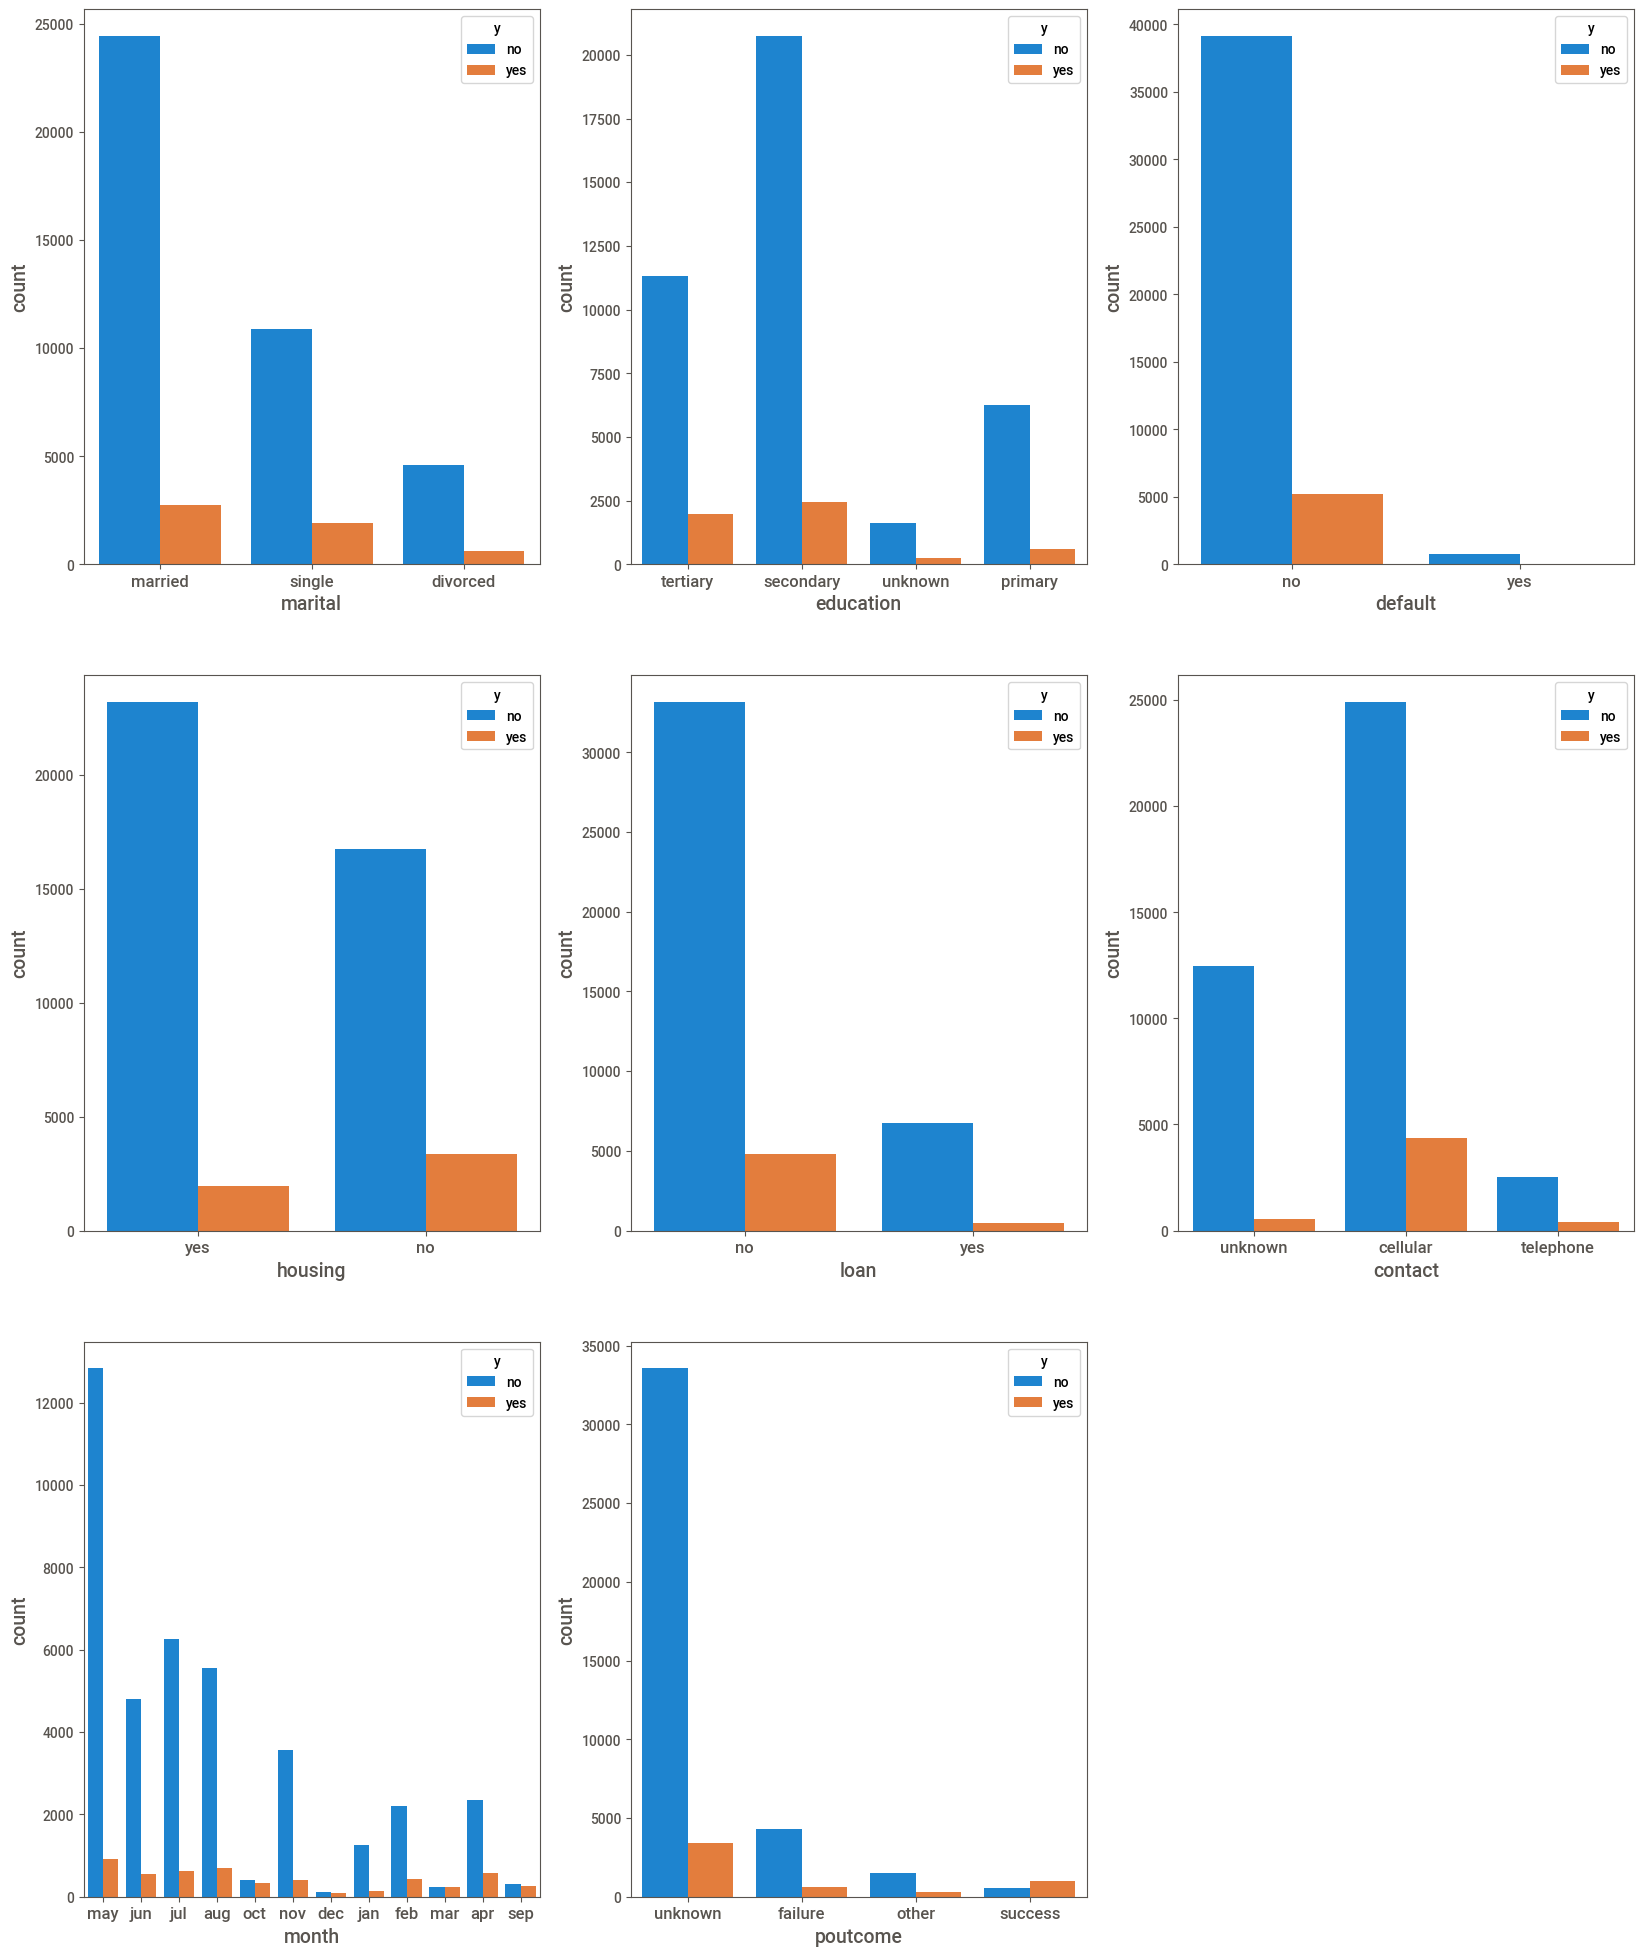

In [17]:
plt.figure(figsize=(20,25), facecolor='white')
plt_num=1

for feat in cat_feat[1:-1]:
    if plt_num<=9:
        plt.subplot(3,3,plt_num)
        sb.countplot(x=feat, data=data, hue=data.y)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=10)
        plt.xlabel(feat, fontsize=14)
        plt.ylabel('count', fontsize=14)
    plt_num+=1
plt.show()

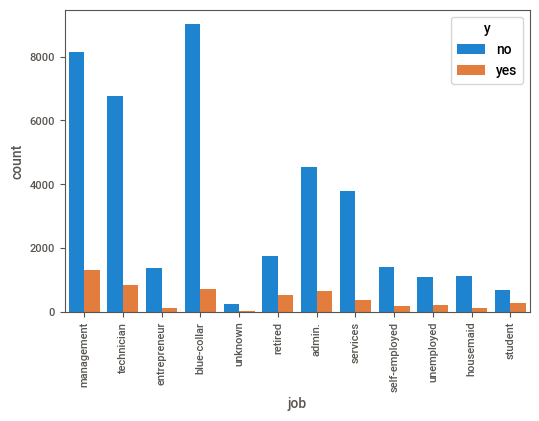

In [18]:
sb.countplot(x='job', data=data, hue=data.y)
plt.xticks(rotation=90)
plt.show()

### bivariate plot between categorical value vs output 'y'

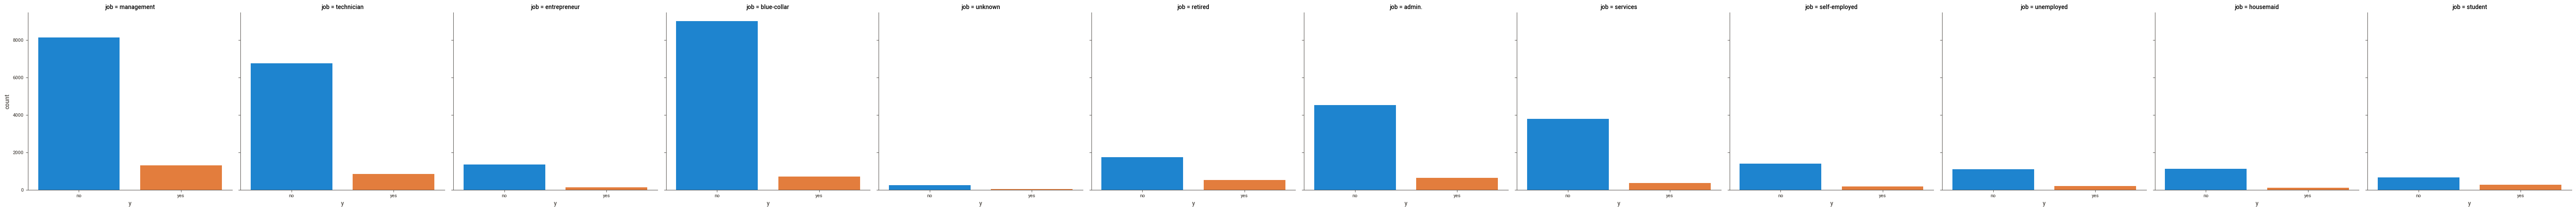

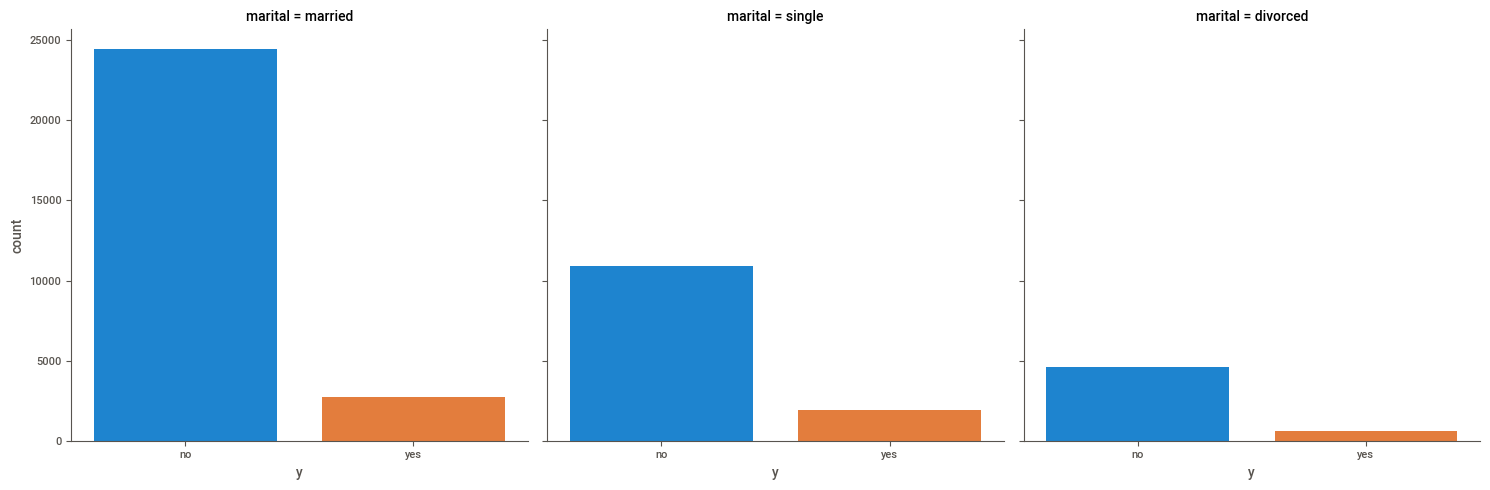

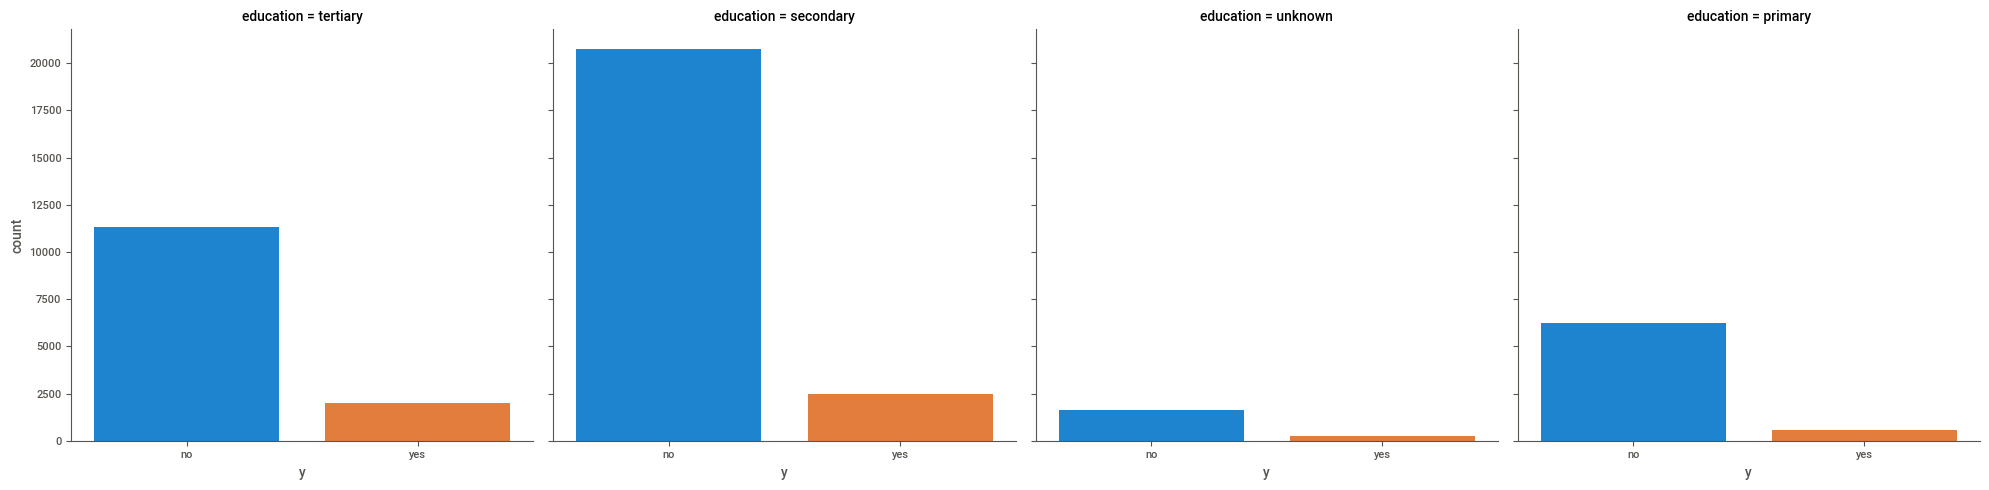

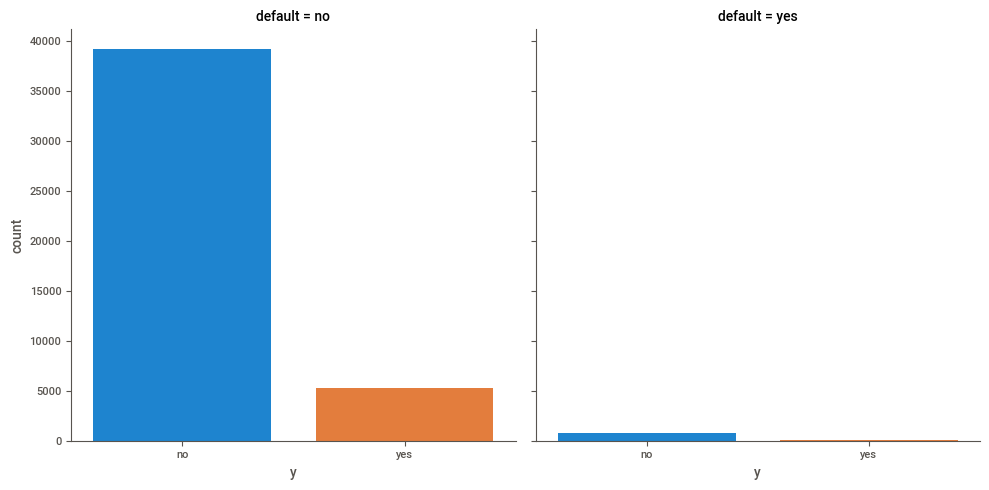

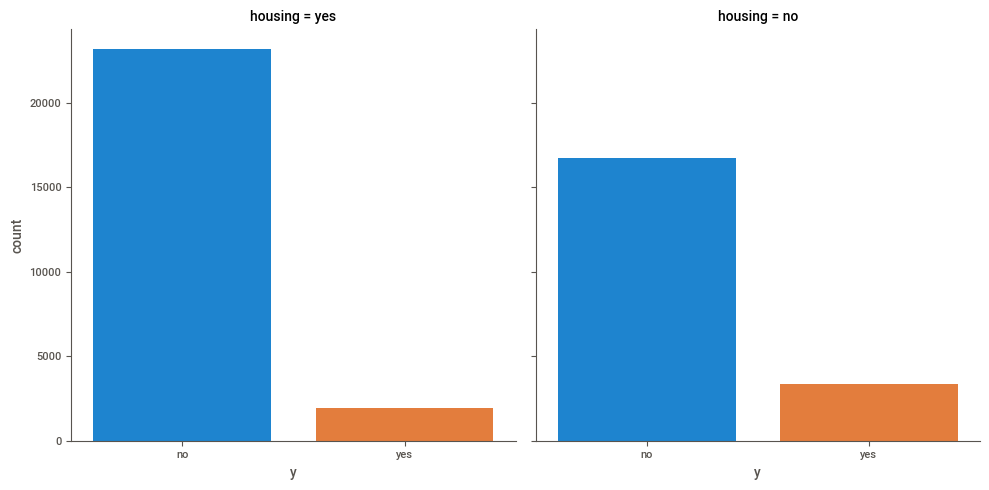

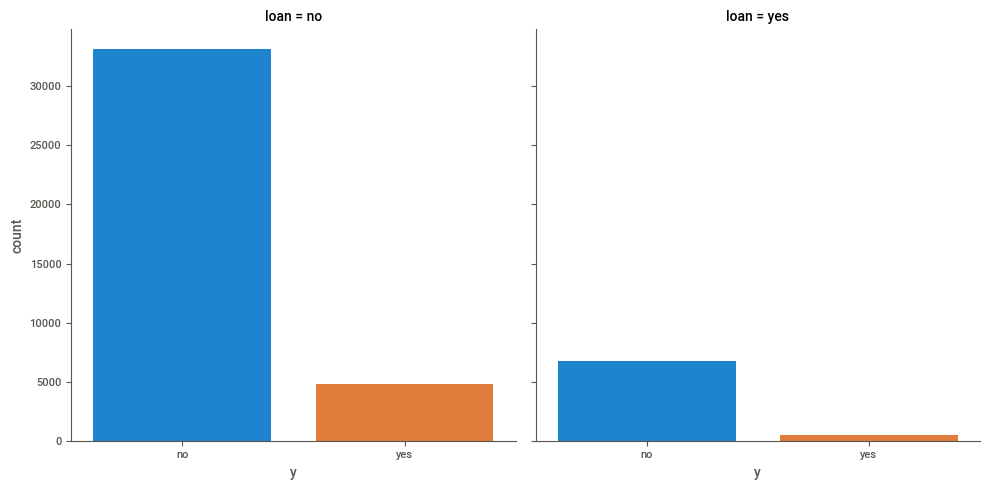

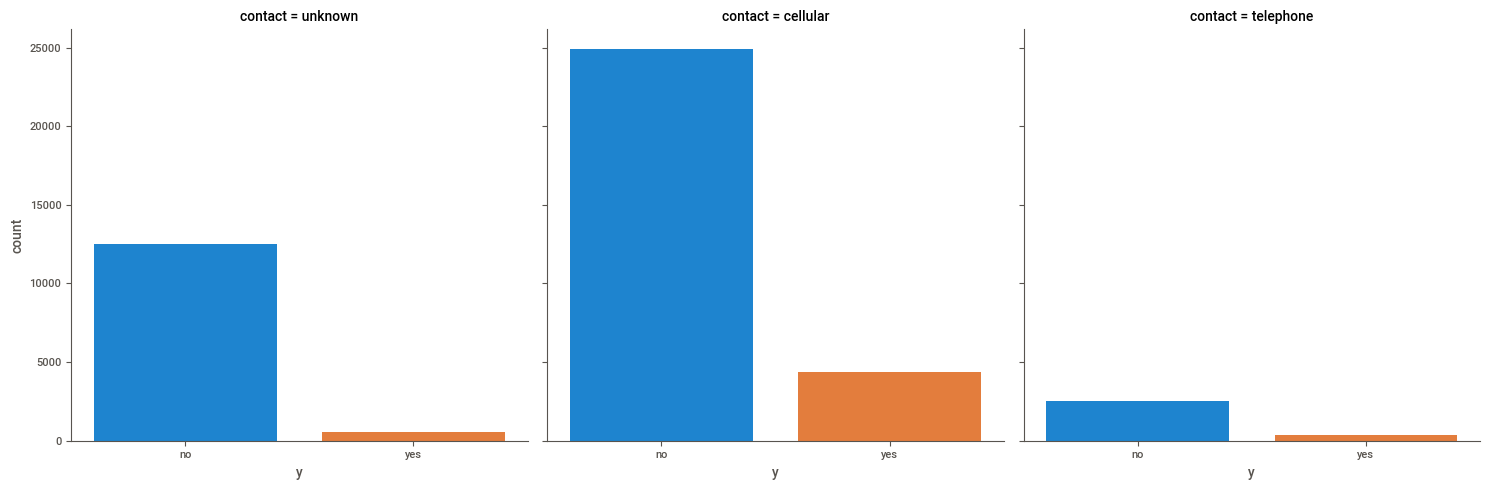

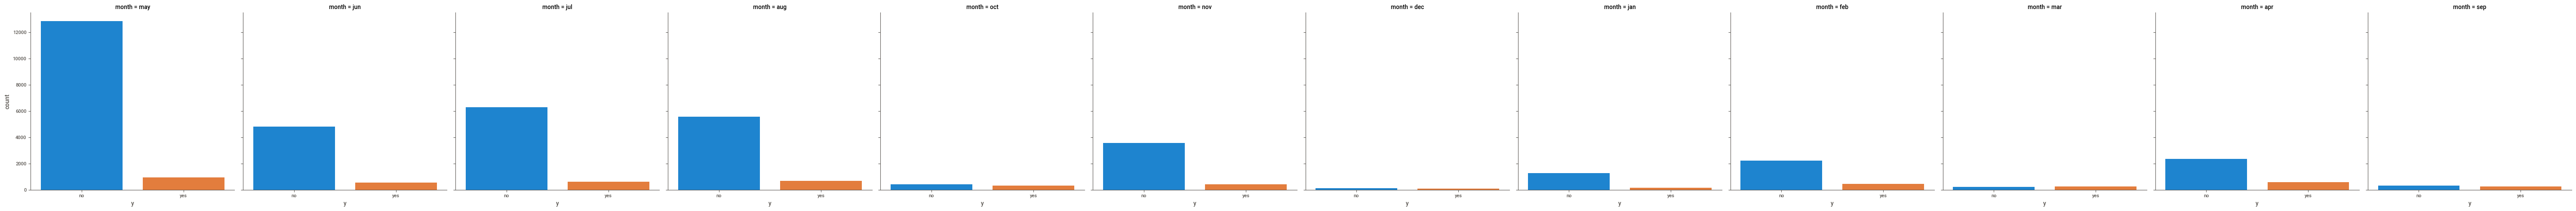

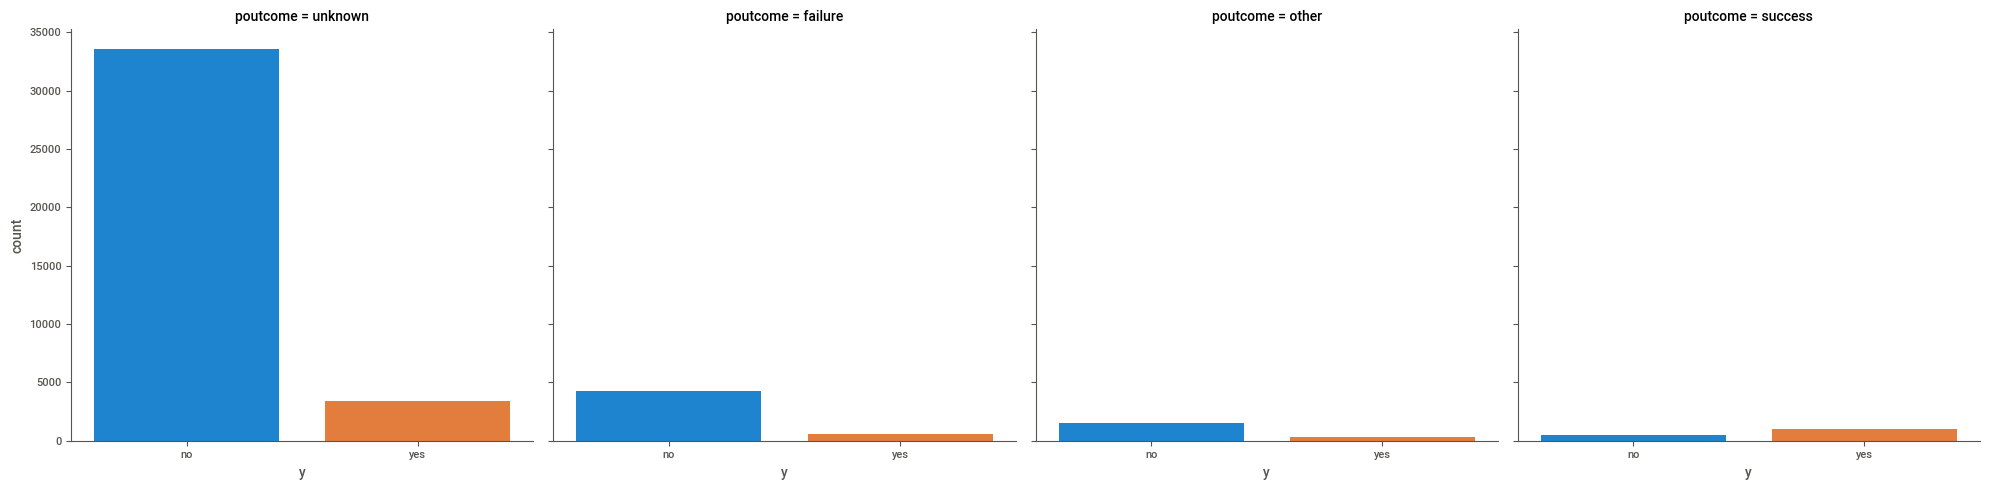

In [19]:
for feat in cat_feat[:-1]:
    sb.catplot(x='y', col=feat, kind='count', data=data)

#### Insight from categorical bivriate plot
clients who are subscribed for term deposit are mainly;
- married.
- who have secondary education.
- have no default credit.
- who doesn't have house loan and personal loan.
- who contacted by cellular contact.
- whose last contact month is May.
- client's whos previous campaign outcome is unknown are mostly chosen term deposit plan of current campaign.

### bivariate plot of numerical features with output 'y'

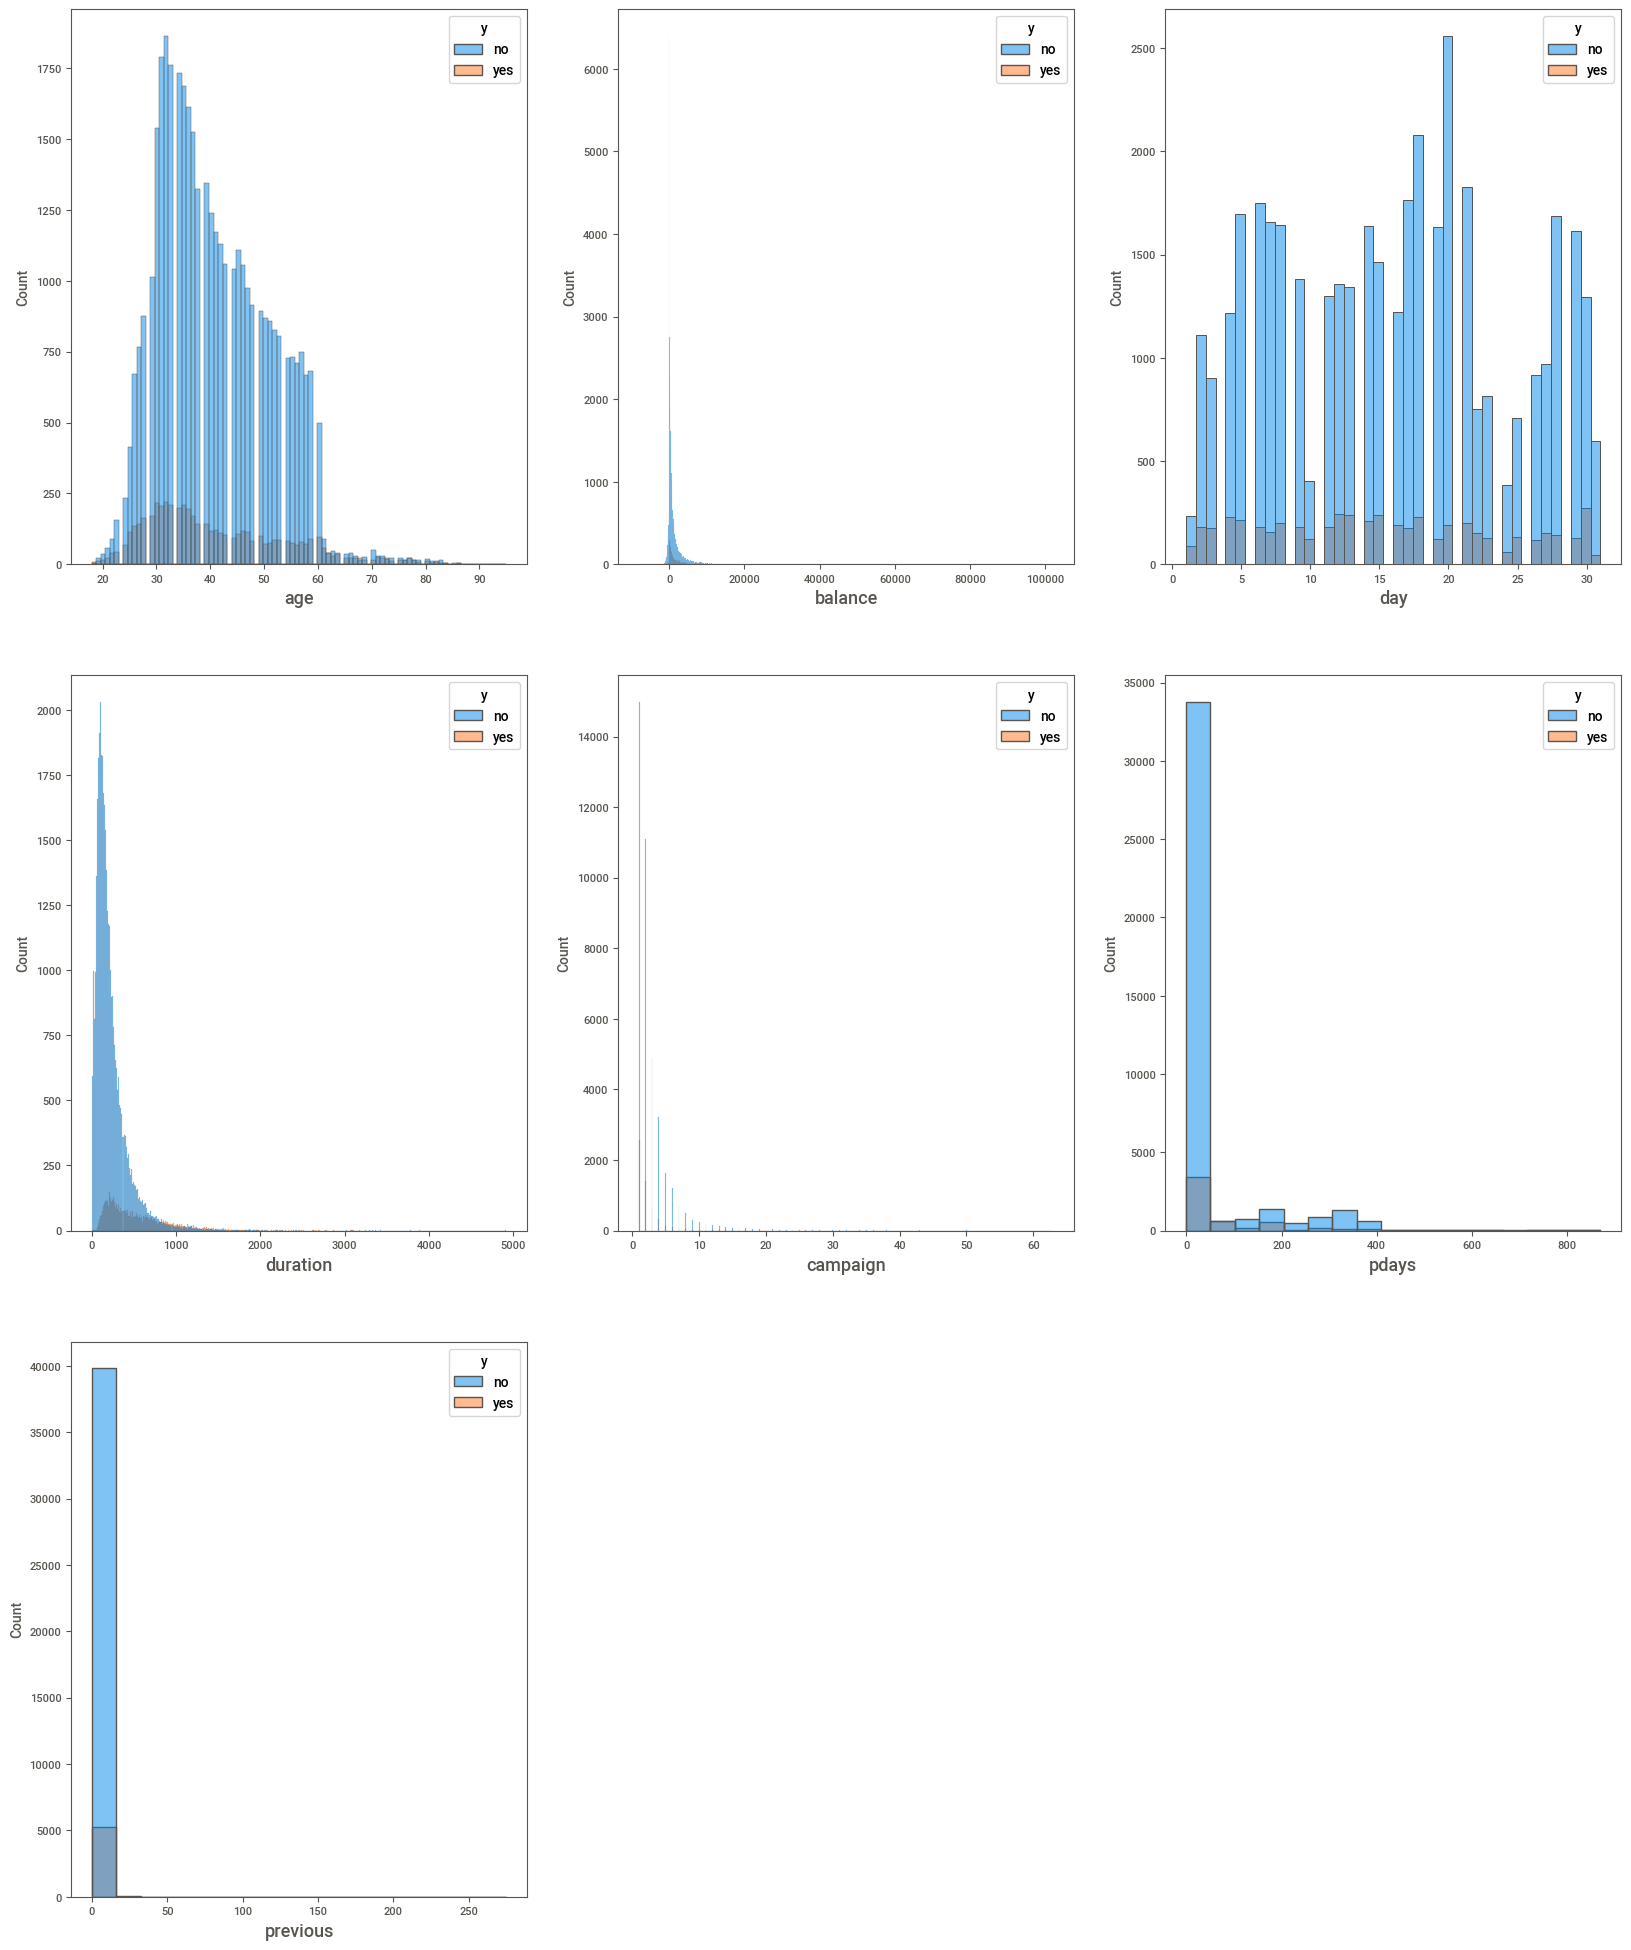

In [20]:
plt.figure(figsize=(20,25), facecolor='white')
plt_num = 1

for feat in num_feat:
    if plt_num<=len(num_feat):
        plt.subplot(3,3,plt_num)
        sb.histplot(x=feat, data=data, hue=data.y)
        plt.xlabel(feat, fontsize=13)
    plt_num+=1
plt.show()

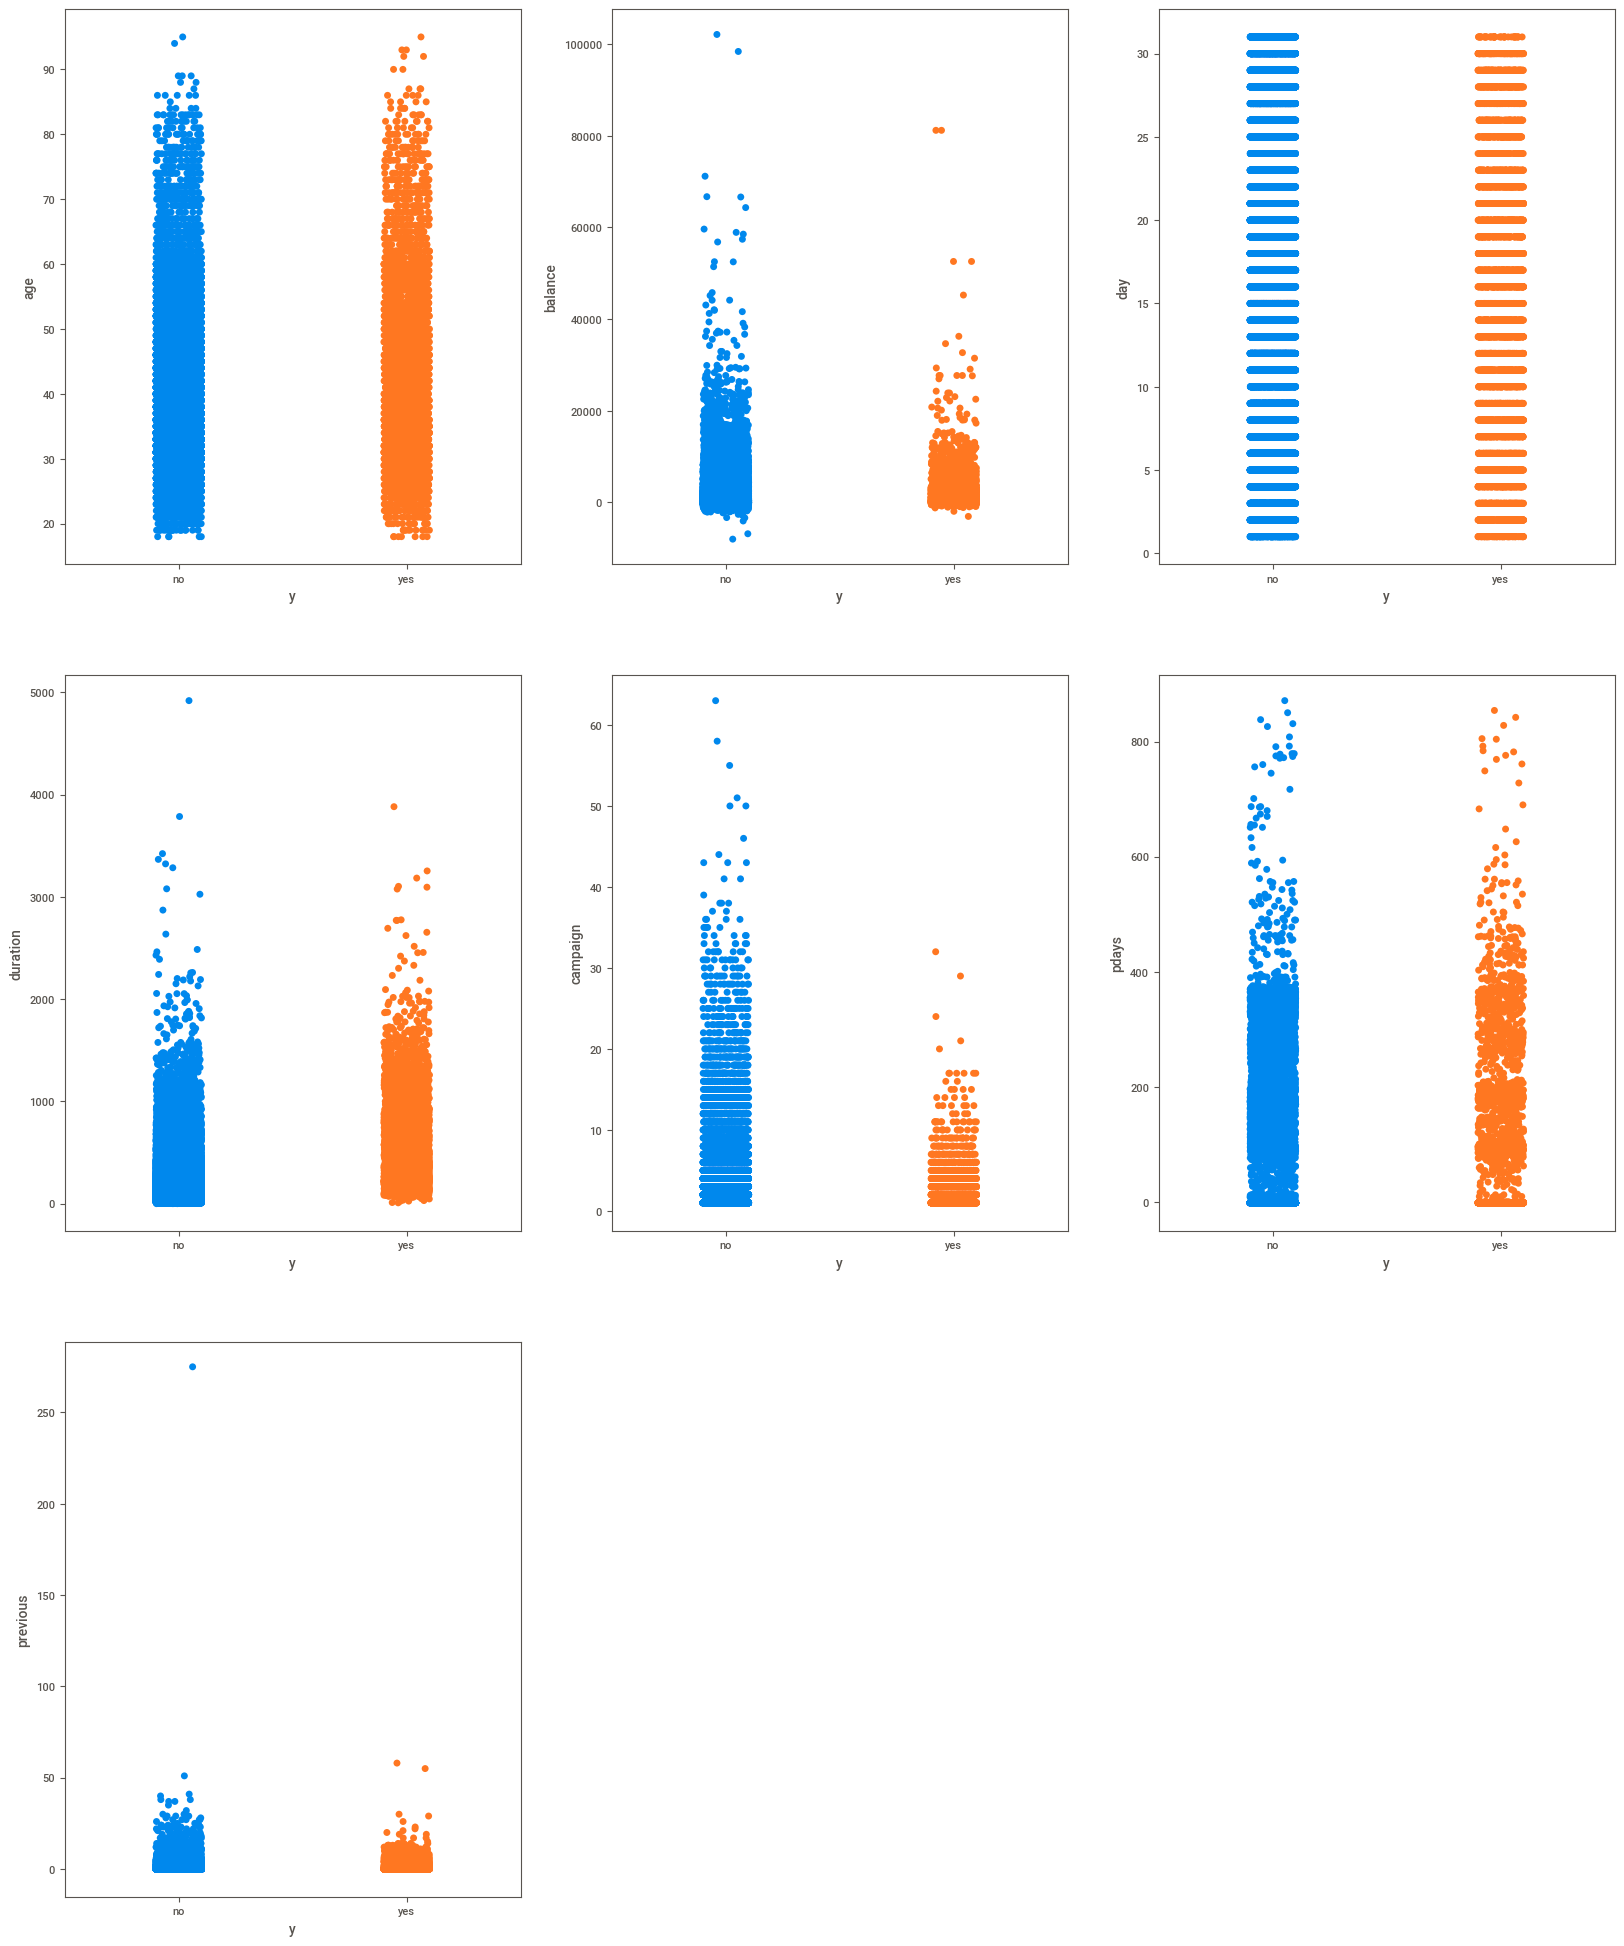

In [21]:
# bivariate plot using stripplot
plt.figure(figsize=(20, 25))
plt_num = 1
for feat in num_feat:
    if plt_num<=7:
        plt.subplot(3,3,plt_num)
        sb.stripplot(x='y', y=feat, data=data)
    plt_num+=1
plt.show()

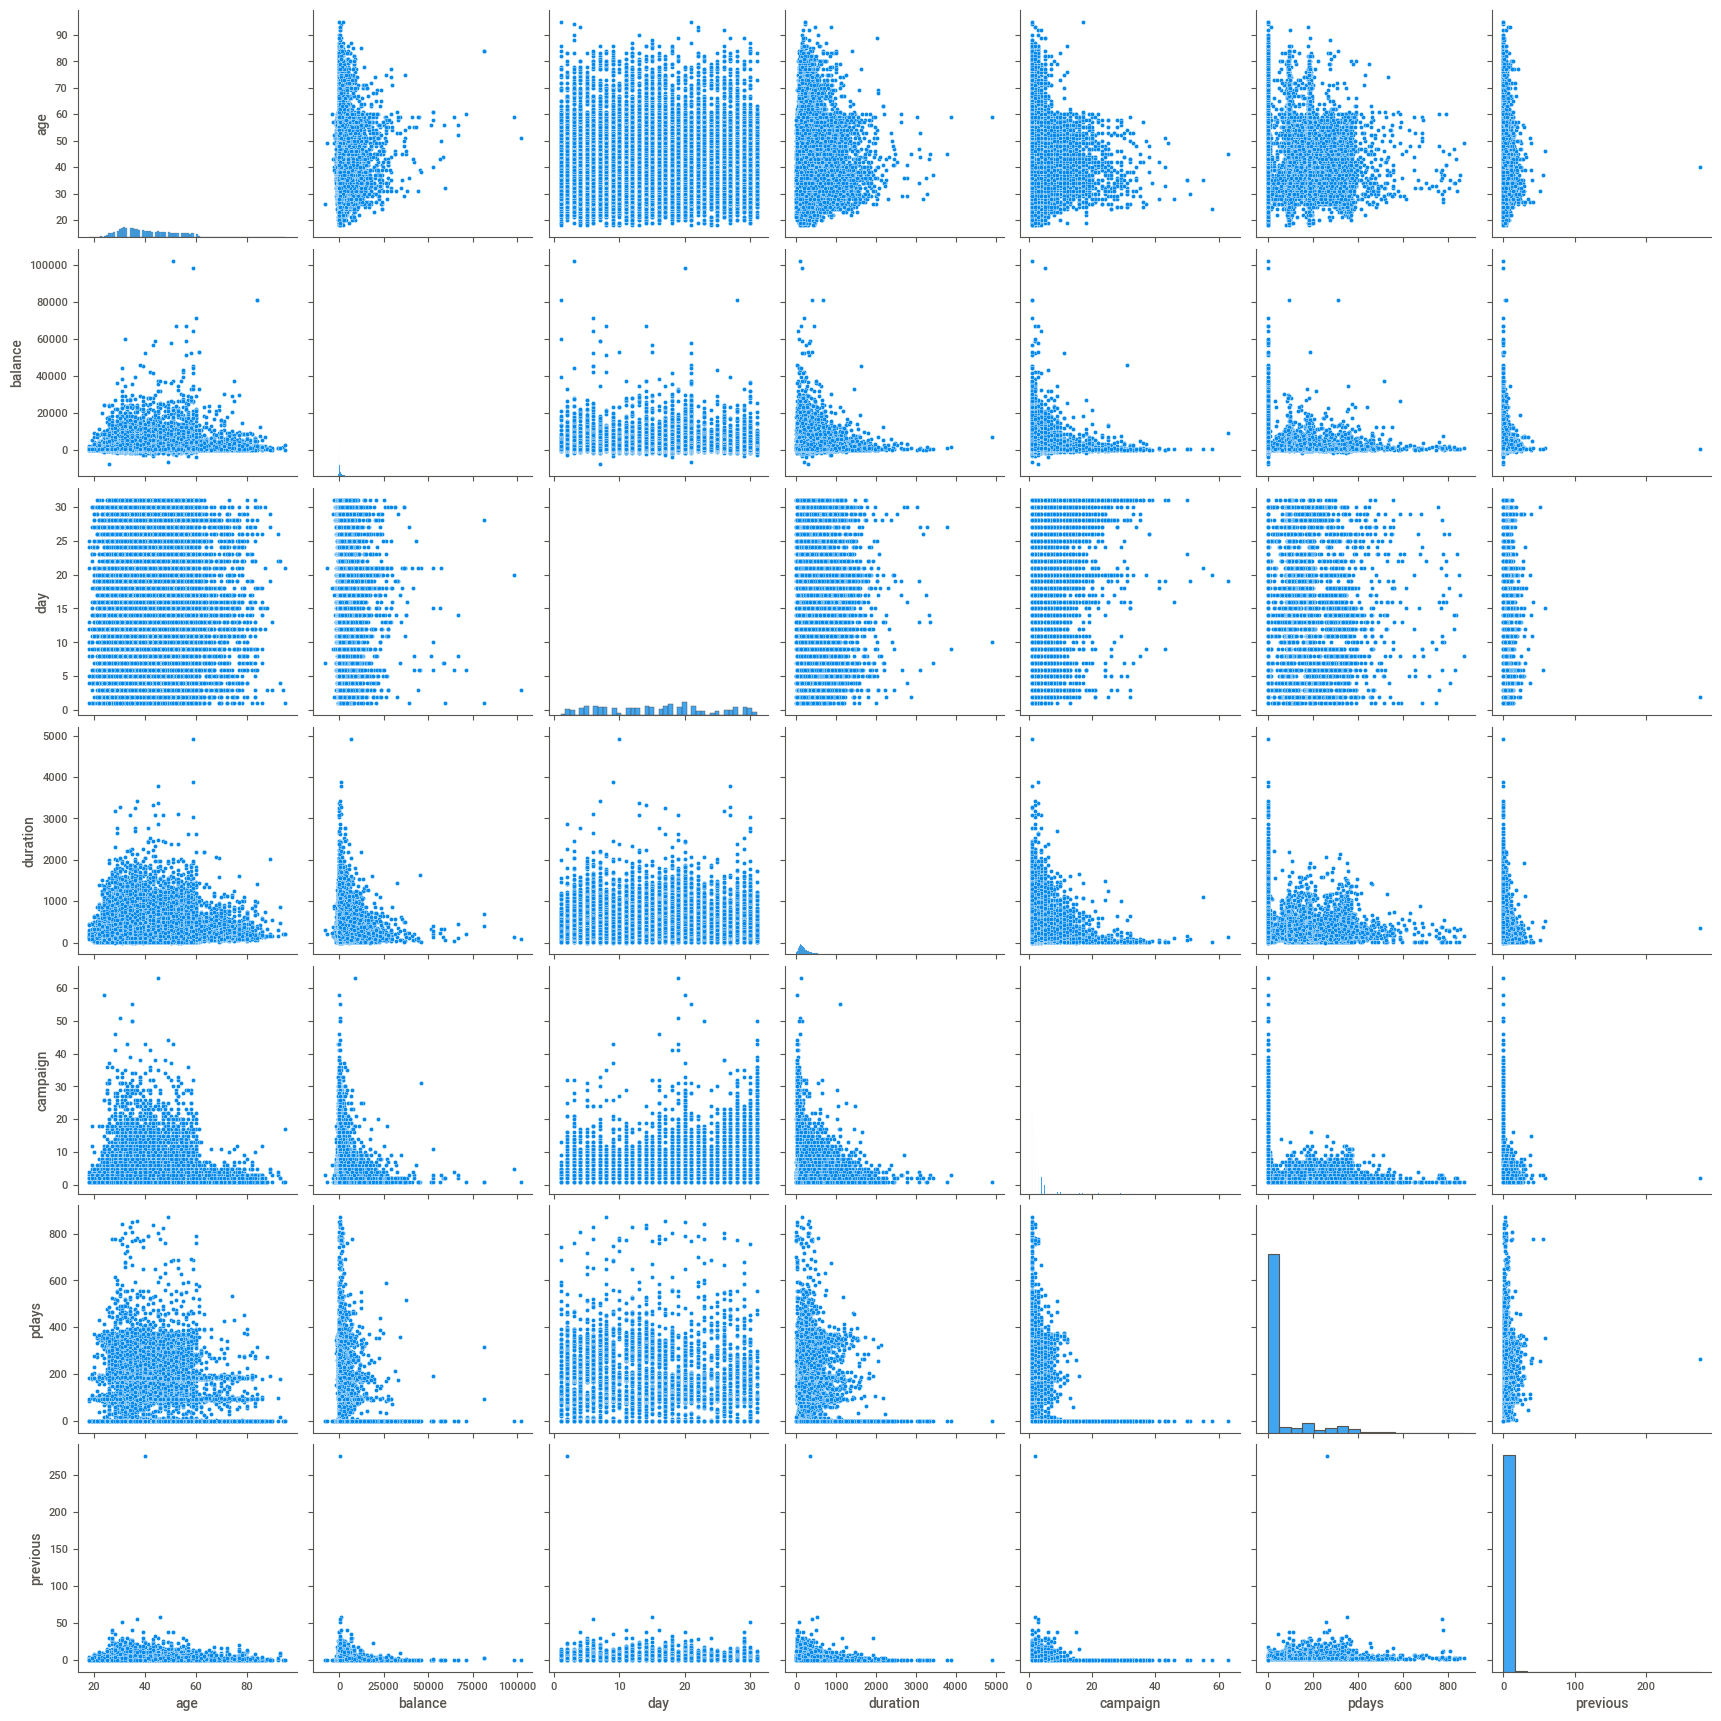

In [26]:
## pairplot of numerical features
sb.pairplot(data)
plt.show()

**Insights from bivariate numerical plot**
- features 'age' and 'day' have almost equal distribution of clients in subscribing and not subscribing term deposit.
- plot also shows that clients who contacted more times are likely to not subscribe compared to subscribers.
- also, only few clients who had contacted more times before starting this campaign are preferred term deposit.

From all the way of EDA it shows that the majority of clients are not subscribed in past. Both in categorical and numerical analysis, majority of the insights are not convinient to positive output class.

Since this dataset is imbalanced, it may result in model with low performance. Later to overcome this we use SMOTE over this data.

# Step 5 : Data Preprocessing

There is no unwanted columns in these dataset.

## Check for features with missing/unknown values

In [7]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Here, missing data points already assigned with unique category 'unknown' label.
features having unknown values;
- Job
- Education
- Contact
- Poutcome

In [6]:
# calculating percentge of 'unknown' in categorical features

unkn_feat = ['job','education', 'contact', 'poutcome']
for feat in unkn_feat:
    unkn_feat = data.loc[data[feat]=='unknown', feat].count()/data[feat].count()
    unkn_percent = round(100*unkn_feat, 2)
    print('"%s" have %0.2f percent of "unknown" values.'%(feat, unkn_percent))

"job" have 0.64 percent of "unknown" values.
"education" have 4.11 percent of "unknown" values.
"contact" have 28.80 percent of "unknown" values.
"poutcome" have 81.75 percent of "unknown" values.


features having Unknown values
- Job; unknown 288(<1%)
- Education; unknown 1857(4%)
- Contact; unknown 13020(29%)
- Poutcome; unknown 36959(82%)

Here 'poutcome' feature have morethan 80% 'unknown' values. we will remove this feature after checking feature multicolinearity. Let keep going with other unknown values. If model performance is bad, will return and deal with these values.

## Check for Outliers 

In [ ]:
plt.figure(figsize=(20,15))
plt_num = 1

for feat in num_feat:
    if plt_num<=7:
        plt.subplot(3,3,plt_num)
        sb.boxplot(x=feat, data=data)
    plt_num+=1
plt.show()

Here, except for feature 'day' all the numerical features have outliers.

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
## dealing with 'age' feature outliers
data.groupby(['y','age'], sort=True)['age'].count()

In [ ]:
data.age.describe()

In [ ]:
## dealing 'balance' feature outliers
data.groupby(['y', 'balance'], sort=True)['balance'].count()

In [ ]:
data.balance.describe()

In [ ]:
## dealing with 'duration' feature outliers
data.groupby(['y', 'duration'], sort=True)['duration'].count()

In [ ]:
data.duration.describe()

In [ ]:
## dealing with 'campaign' feature outliers
data.groupby(['y', 'campaign'], sort=True)['campaign'].count()

In [ ]:
data.campaign.describe()

In [ ]:
## dealing with 'pdays' feature outliers
data.groupby(['y', 'pdays'], sort=True)['pdays'].count()

In [ ]:
data.pdays.describe()

In [ ]:
## dealing with 'previous' feature outliers
data.groupby(['y', 'previous'], sort=True)['previous'].count()

In [ ]:
data.previous.describe()

**On Otliers:**
- 'age': It is possible for client having age between 18 and 95, so we don't remove it's outliers.
- 'balance': This feature have effect on output, as balance goes high chance of rejecting term deposite is little high.     Also it is possible to have this much range of values for 'balance' feature hence we will not remove it.
- 'duration': This feature also have possible values, we don't remove.
- 'campaign': This feature have effect on output, as campaign(number of contacts) goes high chance of rejecting term deposite is more, hence we will not remove it.
- 'pdays': possible chance to have these values.
- 'previous': There is possible scenario to have these values.

In domain research and study, it has found that many of these outlier are possible in real life scenario when considering large population. So it may be good for keeping these values for better generalization ability of model.

In [ ]:
## correlation
data.corr()

In [7]:
data_df = data.copy()

## Convert categorical to numerical

In [8]:
## converting 'y' output values into numerical by manual encoding
data_df.loc[data_df['y']=='yes', 'y'] = 1
data_df.loc[data_df['y']=='no', 'y'] = 0

In [9]:
# changing 'y' datatype
data_df['y'] = data_df.y.astype('int')

In [9]:
data_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [10]:
## Label Encoding of categorical features
from sklearn.preprocessing import LabelEncoder

In [11]:
enc = LabelEncoder()
data_df[cat_feat[:-1]] = data_df[cat_feat[:-1]].apply(enc.fit_transform)

In [12]:
data_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [13]:
## we can store categorical values with corresponding encoded values as a DataFrame so that we can use as referance while 
## testing or deployment.

cat_feat_code = [cat+'_code' for cat in cat_feat]
cat_df = pd.DataFrame() 
for i in range(len(cat_feat[:-1])):
    name = pd.Series(data[cat_feat[i]].unique())
    code = pd.Series(data_df[cat_feat[i]].unique())
    cat_df[cat_feat[i]] = name
    cat_df[cat_feat_code[i]] = code

cat_df

,job,job_code,marital,marital_code,education,education_code,default,default_code,housing,housing_code,loan,loan_code,contact,contact_code,month,month_code,poutcome,poutcome_code
0,management,4,married,1.0,tertiary,2.0,no,0.0,yes,1.0,no,0.0,unknown,2.0,may,8,unknown,3.0
1,technician,9,single,2.0,secondary,1.0,yes,1.0,no,0.0,yes,1.0,cellular,0.0,jun,6,failure,0.0
2,entrepreneur,2,divorced,0.0,unknown,3.0,NaN,NaN,NaN,NaN,NaN,NaN,telephone,1.0,jul,5,other,1.0
3,blue-collar,1,NaN,NaN,primary,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,aug,1,success,2.0
4,unknown,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,oct,10,NaN,NaN
5,retired,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nov,9,NaN,NaN
6,admin.,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,dec,2,NaN,NaN
7,services,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,jan,4,NaN,NaN
8,self-employed,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,feb,3,NaN,NaN
9,unemployed,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mar,7,NaN,NaN


In [14]:
cat_df.to_csv('labelencoder_reference.csv', index=False)

In [34]:
#processed_data1 = data_df.copy()
#processed_data1.to_csv('processed_data1.csv', index=False)

In [4]:
#data_df = pd.read_csv('processed_data1.csv')
#data_df.head()

In [5]:
data_df.y.value_counts(normalize=True)*100

0    88.30152
1    11.69848
Name: y, dtype: float64

## Format the data

In [14]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int32
 2   marital    45211 non-null  int32
 3   education  45211 non-null  int32
 4   default    45211 non-null  int32
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int32
 7   loan       45211 non-null  int32
 8   contact    45211 non-null  int32
 9   day        45211 non-null  int64
 10  month      45211 non-null  int32
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int32
 16  y          45211 non-null  int32
dtypes: int32(10), int64(7)
memory usage: 4.1 MB


In [15]:
# reducing features byte size
for col in data_df.columns:
    data_df[col] = pd.to_numeric(data_df[col], downcast='integer')

In [16]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int8 
 1   job        45211 non-null  int8 
 2   marital    45211 non-null  int8 
 3   education  45211 non-null  int8 
 4   default    45211 non-null  int8 
 5   balance    45211 non-null  int32
 6   housing    45211 non-null  int8 
 7   loan       45211 non-null  int8 
 8   contact    45211 non-null  int8 
 9   day        45211 non-null  int8 
 10  month      45211 non-null  int8 
 11  duration   45211 non-null  int16
 12  campaign   45211 non-null  int8 
 13  pdays      45211 non-null  int16
 14  previous   45211 non-null  int16
 15  poutcome   45211 non-null  int8 
 16  y          45211 non-null  int8 
dtypes: int16(3), int32(1), int8(13)
memory usage: 1015.6 KB


## Clean the data

### checking for any constant

In [42]:
data_df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,4.339762,1.167725,1.224813,0.018027,1362.272058,0.555838,0.160226,0.640242,15.806419,5.523014,258.163080,2.763841,40.197828,0.580323,2.559974,0.116985
std,10.618762,3.272657,0.608230,0.747997,0.133049,3044.765829,0.496878,0.366820,0.897951,8.322476,3.006911,257.527812,3.098021,100.128746,2.303441,0.989059,0.321406
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,3.000000,103.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,448.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,2.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


There is no feature having constant values since no features have std equal to 0.00

### checking for dublicate records

In [17]:
data_df.loc[data_df.duplicated(keep='first'), :]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [45]:
data_df.duplicated().sum()

0

In [41]:
data_df.shape

(45211, 17)

# Step 6 : Feature Selection

## Splitting into input and output features

In [16]:
data_df.shape

(45211, 17)

In [18]:
X_raw = data_df.iloc[:, :-1]
y = data_df.y

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int8 
 1   job        45211 non-null  int8 
 2   marital    45211 non-null  int8 
 3   education  45211 non-null  int8 
 4   default    45211 non-null  int8 
 5   balance    45211 non-null  int32
 6   housing    45211 non-null  int8 
 7   loan       45211 non-null  int8 
 8   contact    45211 non-null  int8 
 9   day        45211 non-null  int8 
 10  month      45211 non-null  int8 
 11  duration   45211 non-null  int16
 12  campaign   45211 non-null  int8 
 13  pdays      45211 non-null  int16
 14  previous   45211 non-null  int16
 15  poutcome   45211 non-null  int8 
dtypes: int16(3), int32(1), int8(12)
memory usage: 971.5 KB


In [20]:
y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

## Splitting input and output into train and test subsets

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

import pickle
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import f1_score, recall_score, accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix, roc_curve, roc_auc_score

In [20]:
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X_raw, y, test_size=0.25, random_state=42, stratify=y)

In [21]:
## saving test data separately to new data frame
test_temp = pd.concat([X_test_raw, y_test_raw], axis=1)
test_temp

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
22684,33,9,2,1,0,9,0,1,0,25,1,145,8,-1,0,3,0
30384,32,4,1,2,0,-149,0,0,0,5,3,93,1,8,1,1,0
10483,44,0,1,1,0,32,0,1,2,16,6,241,3,-1,0,3,0
8732,48,1,1,0,0,160,1,0,2,4,6,109,3,-1,0,3,0
21614,57,4,1,2,0,0,0,0,0,19,1,188,4,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1675,28,1,1,1,0,6,1,0,2,9,8,254,1,-1,0,3,0
35592,22,8,2,1,0,252,1,0,0,7,8,206,3,-1,0,3,0
34506,59,0,0,0,0,191,1,0,0,5,8,252,1,-1,0,3,0
13514,29,0,0,2,1,0,0,1,0,9,5,426,3,-1,0,3,1


In [45]:
#test_df = test_temp.copy()
#test_df.to_csv('test_data.csv', index=False)

It is better to balance our imbalanced dataset. Have high imbalance, only 11% of total observation is the class of interest (i.e '1'). So if we not balance, model often missclassify actual class of interest due to it's low class proportion.
We also scale data to make easier for distance based algorithm.

To prevent data leakage between train and test data;
- We only perform oversampling on train data only.
- On applying scaling, fit_transform() only applied on train and transform() on test data.

## Handling imbalance in dataset

In [22]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_raw, y_train_raw)

In [23]:
# counting
from collections import Counter
print('Actual classes :', Counter(y_train_raw))
print('Smote classes :', Counter(y_train_smote))

Actual classes : Counter({0: 29941, 1: 3967})
Smote classes : Counter({0: 29941, 1: 29941})


## Checking any duplicates data after balancing

In [24]:
train_temp = pd.concat([X_train_smote, y_train_smote], axis=1)
train_temp

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,0,1,0,0,18,9,265,1,188,1,0,0
1,47,7,0,1,0,287,0,0,2,20,6,63,1,-1,0,3,0
2,35,4,2,2,0,797,1,0,2,8,8,81,1,-1,0,3,0
3,34,0,0,1,0,627,1,0,2,7,8,283,2,-1,0,3,0
4,35,0,2,1,0,91,1,0,2,23,8,185,4,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59877,38,4,1,1,0,529,0,0,0,15,9,249,1,110,3,1,1
59878,39,2,1,0,0,278,1,0,2,18,7,1021,3,-1,0,3,1
59879,29,7,1,1,0,938,0,0,0,4,8,361,1,-1,0,3,1
59880,36,8,1,0,0,227,0,0,0,20,6,442,1,253,7,0,1


In [20]:
train_temp.loc[train_temp.duplicated(keep='first'), :]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
34093,86,5,0,0,0,0,0,0,0,25,1,188,1,-1,0,3,1
34271,42,9,1,1,0,0,0,0,0,5,8,400,1,-1,0,3,1
35472,48,1,1,1,0,1568,0,0,0,6,5,308,1,46,5,1,1
35625,42,5,0,1,0,759,0,0,0,14,6,735,2,-1,0,3,1
35950,32,3,1,1,0,0,0,0,0,21,2,723,7,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59697,29,2,1,1,0,3407,0,0,0,14,4,232,1,-1,0,3,1
59708,25,8,1,1,0,588,0,0,0,22,0,953,5,-1,0,3,1
59778,41,1,1,1,0,748,0,0,0,21,8,238,2,86,2,0,1
59783,61,5,0,2,0,5,0,0,0,13,9,215,1,182,3,2,1


In [62]:
train_temp.duplicated().sum()

643

In [63]:
# dropping
train_temp.drop_duplicates(keep='first', inplace=True, ignore_index=True)
train_temp.duplicated().sum()

0

In [64]:
train_temp

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,0,1,0,0,18,9,265,1,188,1,0,0
1,47,7,0,1,0,287,0,0,2,20,6,63,1,-1,0,3,0
2,35,4,2,2,0,797,1,0,2,8,8,81,1,-1,0,3,0
3,34,0,0,1,0,627,1,0,2,7,8,283,2,-1,0,3,0
4,35,0,2,1,0,91,1,0,2,23,8,185,4,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59234,26,7,1,1,0,2969,0,0,0,3,10,800,2,-1,0,3,1
59235,62,4,0,1,0,703,0,0,0,8,3,177,1,95,1,2,1
59236,45,6,1,1,0,1969,0,0,0,15,0,208,1,370,2,2,1
59237,63,5,1,1,0,2569,0,0,1,17,1,213,2,-1,0,3,1


## Feature Scaling

In [65]:
# use fit_transform() to input train data
# later we use transform() test data
ssc = StandardScaler()
train_temp.iloc[:,:-1] = ssc.fit_transform(train_temp.iloc[:, :-1])

In [66]:
## saving for using later, after deployment or during separate testing
ssc_file = 's_scaler.pkl'
with open(ssc_file, 'wb') as file:
    pickle.dump(ssc, file)

In [67]:
train_temp

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.571680,-0.100346,-0.129807,1.225143,-0.104672,-0.481972,1.252872,-0.329037,-0.549223,0.341281,1.281214,-0.324920,-0.525749,1.295964,0.109512,-2.367249,0
1,0.559861,0.897590,-1.794225,-0.206539,-0.104672,-0.393165,-0.798166,-0.329037,2.052778,0.596245,0.257665,-0.901369,-0.525749,-0.481496,-0.327232,0.544636,0
2,-0.543942,-0.100346,1.534612,1.225143,-0.104672,-0.235355,1.252872,-0.329037,2.052778,-0.933540,0.940031,-0.850002,-0.525749,-0.481496,-0.327232,0.544636,0
3,-0.635925,-1.430926,-1.794225,-0.206539,-0.104672,-0.287958,1.252872,-0.329037,2.052778,-1.061022,0.940031,-0.273553,-0.138770,-0.481496,-0.327232,0.544636,0
4,-0.543942,-1.430926,1.534612,-0.206539,-0.104672,-0.453814,1.252872,-0.329037,2.052778,0.978691,0.940031,-0.553216,0.635188,-0.481496,-0.327232,0.544636,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59234,-1.371794,0.897590,-0.129807,-0.206539,-0.104672,0.436731,-0.798166,-0.329037,-0.549223,-1.570950,1.622396,1.201814,-0.138770,-0.481496,-0.327232,0.544636,1
59235,1.939614,-0.100346,-1.794225,-0.206539,-0.104672,-0.264441,-0.798166,-0.329037,-0.549223,-0.933540,-0.765883,-0.576046,-0.525749,0.421341,0.109512,-0.425992,1
59236,0.375894,0.564945,-0.129807,-0.206539,-0.104672,0.127299,-0.798166,-0.329037,-0.549223,-0.041166,-1.789431,-0.487581,-0.525749,3.007592,0.546257,-0.425992,1
59237,2.031597,0.232300,-0.129807,-0.206539,-0.104672,0.312958,-0.798166,-0.329037,0.751778,0.213799,-1.448248,-0.473312,-0.138770,-0.481496,-0.327232,0.544636,1


## Looking for important features

In [49]:
# Pearson Correlation
train_temp.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.034402,-0.393424,-0.120300,-0.016293,0.128423,-0.149846,-0.020444,0.011732,-0.004581,-0.032403,-0.023259,0.001111,-0.010520,0.014708,-0.002004,0.008416
job,-0.034402,1.000000,0.065023,0.152181,-0.007541,0.018557,-0.108216,-0.023352,-0.069032,0.012827,-0.072711,-0.023658,-0.000300,-0.011034,0.007830,0.000551,0.011702
marital,-0.393424,0.065023,1.000000,0.127281,0.011378,-0.019681,0.052027,0.009057,0.024760,0.006707,0.015463,-0.094153,0.018826,-0.008735,-0.003604,0.006620,-0.134018
education,-0.120300,0.152181,0.127281,1.000000,0.003601,0.053864,-0.027473,-0.005876,-0.058893,0.026659,-0.026599,-0.118681,0.016836,-0.000285,0.015995,-0.019023,-0.085619
default,-0.016293,-0.007541,0.011378,0.003601,1.000000,-0.055317,0.031877,0.093080,0.038340,0.011950,0.018857,-0.033982,0.026503,-0.032201,-0.024563,0.039477,-0.078011
balance,0.128423,0.018557,-0.019681,0.053864,-0.055317,1.000000,-0.094017,-0.083127,-0.045108,0.004655,0.000058,0.017921,-0.019591,0.011790,0.018877,-0.043761,0.081814
housing,-0.149846,-0.108216,0.052027,-0.027473,0.031877,-0.094017,1.000000,0.141231,0.288306,0.013843,0.237389,-0.065709,0.070144,0.045538,-0.016722,-0.000584,-0.406692
loan,-0.020444,-0.023352,0.009057,-0.005876,0.093080,-0.083127,0.141231,1.000000,0.070942,0.027977,0.043422,-0.077653,0.054630,-0.051091,-0.037173,0.055235,-0.245639
contact,0.011732,-0.069032,0.024760,-0.058893,0.038340,-0.045108,0.288306,0.070942,1.000000,0.010784,0.316403,-0.073312,0.086095,-0.230461,-0.155746,0.267474,-0.346993
day,-0.004581,0.012827,0.006707,0.026659,0.011950,0.004655,0.013843,0.027977,0.010784,1.000000,-0.006159,-0.025882,0.149572,-0.065885,-0.051262,0.066422,-0.078035


## Heatmap plot

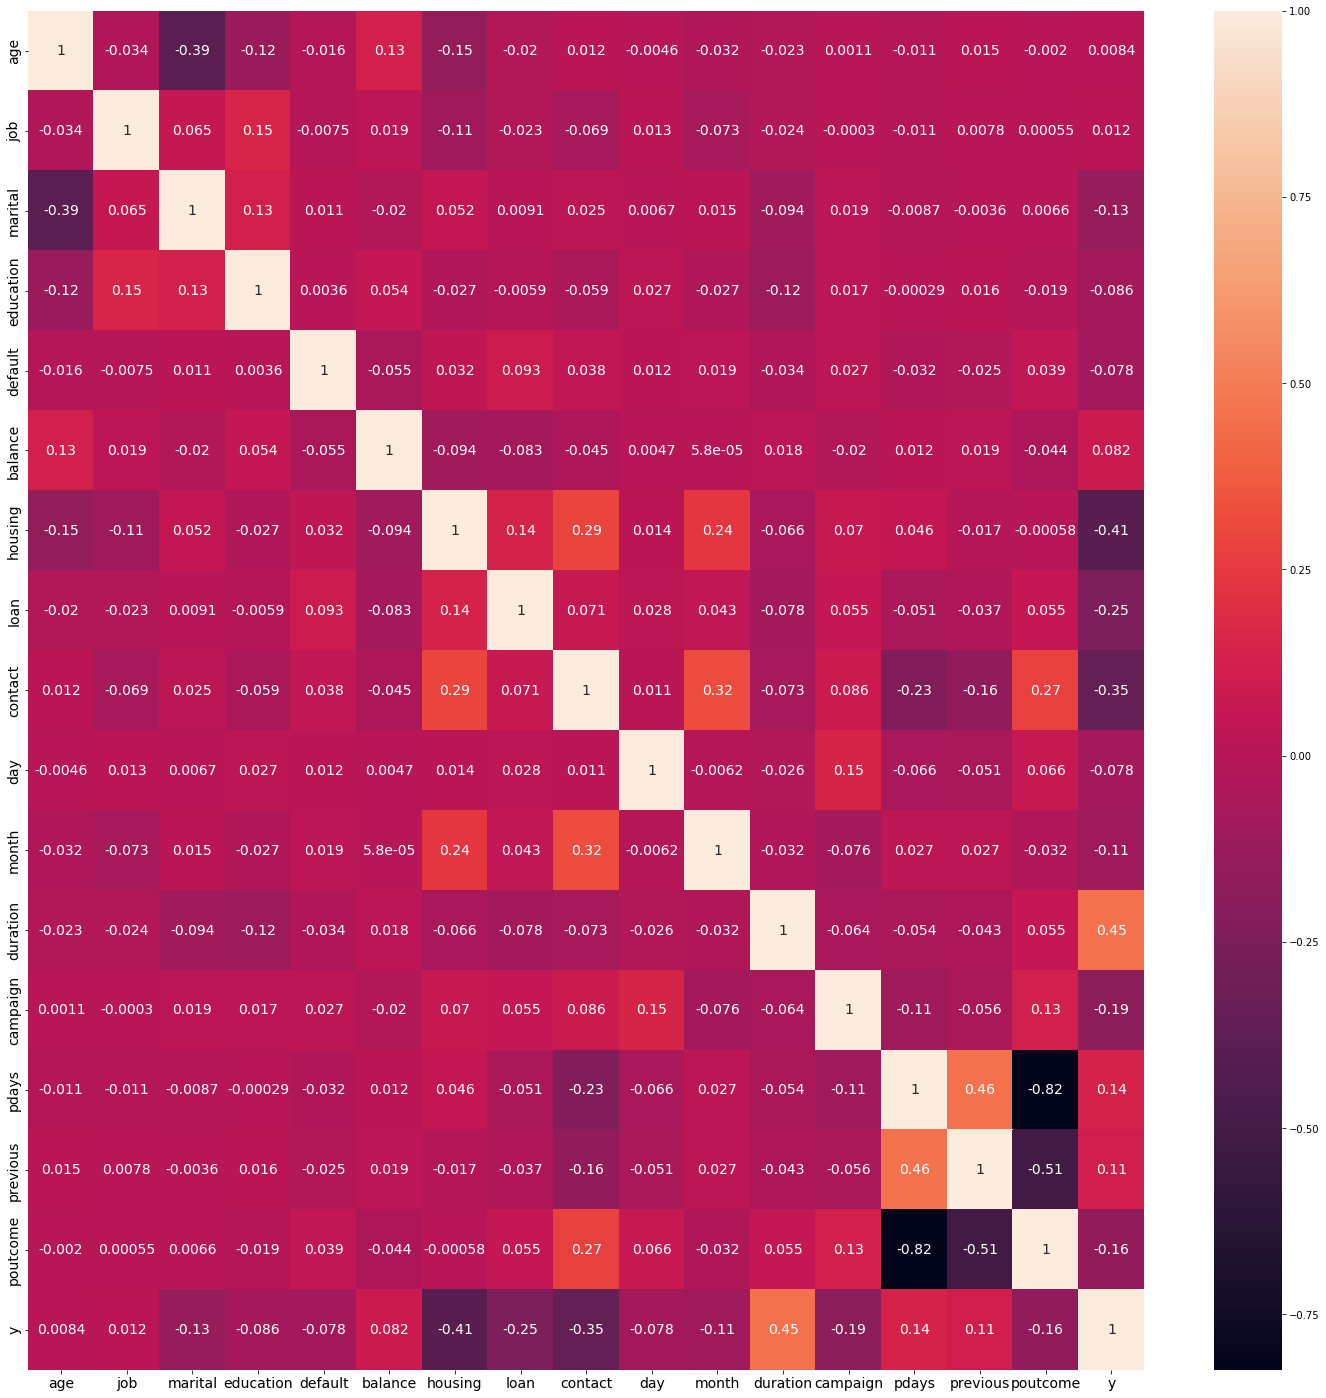

In [50]:
plt.figure(figsize=(25, 25))
sb.heatmap(train_temp.corr(), annot=True, annot_kws={'size':14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Checking using ExtraTree Classifier

In [51]:
from sklearn.ensemble import ExtraTreesClassifier
feat_impModel = ExtraTreesClassifier()
feat_impModel.fit(train_temp.iloc[:, :-1], train_temp.iloc[:,-1]) # (x, y)

ExtraTreesClassifier()

In [52]:
print(feat_impModel.feature_importances_)

[0.05397609 0.05521722 0.02144913 0.02993175 0.00325406 0.05547731
 0.12990775 0.04665906 0.10215138 0.06573245 0.08266902 0.23496078
 0.0448021  0.02533033 0.01260218 0.03587939]


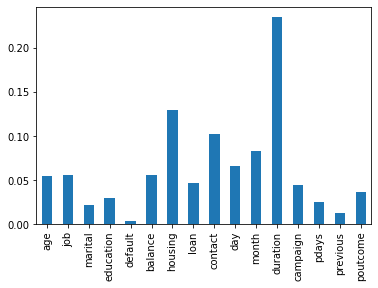

In [53]:
feat_imp_srs = pd.Series(feat_impModel.feature_importances_, index=train_temp.columns[:-1])
feat_imp_srs.plot(kind='bar')
plt.show()

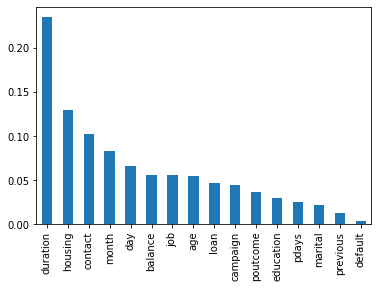

In [54]:
feat_imp_srs.nlargest(16).plot(kind='bar')
plt.show()

Here feature 'pdays' and 'poutcome' have high multicolinearity, so we can drop one of these features which has less corelation with output variable. 'poutcome' has -0.15 and 'pdays' has 0.14. Also earlier we have found that 'poutcome' about 81% of 'unknown' labeled values so it is more convinient to remove 'poutcome' feature.

In [68]:
train_temp.drop(columns='poutcome', axis=1, inplace=True)
train_temp.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,1.571680,-0.100346,-0.129807,1.225143,-0.104672,-0.481972,1.252872,-0.329037,-0.549223,0.341281,1.281214,-0.324920,-0.525749,1.295964,0.109512,0
1,0.559861,0.897590,-1.794225,-0.206539,-0.104672,-0.393165,-0.798166,-0.329037,2.052778,0.596245,0.257665,-0.901369,-0.525749,-0.481496,-0.327232,0
2,-0.543942,-0.100346,1.534612,1.225143,-0.104672,-0.235355,1.252872,-0.329037,2.052778,-0.933540,0.940031,-0.850002,-0.525749,-0.481496,-0.327232,0
3,-0.635925,-1.430926,-1.794225,-0.206539,-0.104672,-0.287958,1.252872,-0.329037,2.052778,-1.061022,0.940031,-0.273553,-0.138770,-0.481496,-0.327232,0
4,-0.543942,-1.430926,1.534612,-0.206539,-0.104672,-0.453814,1.252872,-0.329037,2.052778,0.978691,0.940031,-0.553216,0.635188,-0.481496,-0.327232,0


In [69]:
#train_data = train_temp.copy()
#train_data.to_csv('train_data.csv', index=False)

In [26]:
#train_data = pd.read_csv('train_data.csv')
#train_data

In [27]:
#train_df = train_data.copy()

# Step 7 : Model Selection and Building

In [28]:
train_df = train_temp.copy()
train_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
0,1.571680,-0.100346,-0.129807,1.225143,-0.104672,-0.481972,1.252872,-0.329037,-0.549223,0.341281,1.281214,-0.324920,-0.525749,1.295964,0.109512,0
1,0.559861,0.897590,-1.794225,-0.206539,-0.104672,-0.393165,-0.798166,-0.329037,2.052778,0.596245,0.257665,-0.901369,-0.525749,-0.481496,-0.327232,0
2,-0.543942,-0.100346,1.534612,1.225143,-0.104672,-0.235355,1.252872,-0.329037,2.052778,-0.933540,0.940031,-0.850002,-0.525749,-0.481496,-0.327232,0
3,-0.635925,-1.430926,-1.794225,-0.206539,-0.104672,-0.287958,1.252872,-0.329037,2.052778,-1.061022,0.940031,-0.273553,-0.138770,-0.481496,-0.327232,0
4,-0.543942,-1.430926,1.534612,-0.206539,-0.104672,-0.453814,1.252872,-0.329037,2.052778,0.978691,0.940031,-0.553216,0.635188,-0.481496,-0.327232,0


In [29]:
## split into X_train and y_train
X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]

In [36]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
0,1.571680,-0.100346,-0.129807,1.225143,-0.104672,-0.481972,1.252872,-0.329037,-0.549223,0.341281,1.281214,-0.324920,-0.525749,1.295964,0.109512
1,0.559861,0.897590,-1.794225,-0.206539,-0.104672,-0.393165,-0.798166,-0.329037,2.052778,0.596245,0.257665,-0.901369,-0.525749,-0.481496,-0.327232
2,-0.543942,-0.100346,1.534612,1.225143,-0.104672,-0.235355,1.252872,-0.329037,2.052778,-0.933540,0.940031,-0.850002,-0.525749,-0.481496,-0.327232
3,-0.635925,-1.430926,-1.794225,-0.206539,-0.104672,-0.287958,1.252872,-0.329037,2.052778,-1.061022,0.940031,-0.273553,-0.138770,-0.481496,-0.327232
4,-0.543942,-1.430926,1.534612,-0.206539,-0.104672,-0.453814,1.252872,-0.329037,2.052778,0.978691,0.940031,-0.553216,0.635188,-0.481496,-0.327232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59234,-1.371794,0.897590,-0.129807,-0.206539,-0.104672,0.436731,-0.798166,-0.329037,-0.549223,-1.570950,1.622396,1.201814,-0.138770,-0.481496,-0.327232
59235,1.939614,-0.100346,-1.794225,-0.206539,-0.104672,-0.264441,-0.798166,-0.329037,-0.549223,-0.933540,-0.765883,-0.576046,-0.525749,0.421341,0.109512
59236,0.375894,0.564945,-0.129807,-0.206539,-0.104672,0.127299,-0.798166,-0.329037,-0.549223,-0.041166,-1.789431,-0.487581,-0.525749,3.007592,0.546257
59237,2.031597,0.232300,-0.129807,-0.206539,-0.104672,0.312958,-0.798166,-0.329037,0.751778,0.213799,-1.448248,-0.473312,-0.138770,-0.481496,-0.327232


## Cross checking of multiple Machine Learning Algorithms

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [31]:
# preparing models
models = []

models.append(('LR',LogisticRegression(random_state=42, max_iter=1000)))
models.append(('KNNC',KNeighborsClassifier()))
models.append(('GNB',GaussianNB()))
models.append(('DTC',DecisionTreeClassifier()))
models.append(('RFC',RandomForestClassifier()))
models.append(('BC',BaggingClassifier()))
models.append(('ABC',AdaBoostClassifier()))
models.append(('GBC',GradientBoostingClassifier()))
models.append(('XGBC',XGBClassifier(eval_metric='mlogloss')))

- For cross validation we use pipeline from imblearn rather than from sklearn because since, SMOTE doesn’t have a ‘fit_transform’ method, we cannot use it with ‘Scikit-Learn’ pipeline.
- We use train set to split further into train-validation for both training and validating models. Evaluation will be done on test set.
- For performance measure, instead of using 'accuracy_score' we mainly focus on 'recall_score', 'roc_auc' and 'f1_score'. Because 'accuracy_score' always may not be proper measure of performace mainly and moreover our model's aim is to predict whether a customer subscribe or not. Therefore, more focused on FalseNegative(FN), so model don't missclassify as 'no' for any client who actualy chose 'yes'.

To check with multiple model, we use entire input 'X' and output 'y' sets. All preprocessing steps that we done on train set will be done here using pipeline for each iteration. 

In [32]:
## removing 'poutcome' feature from X
print(X_train.shape[-1], X_raw.shape[-1])
X = X_raw.copy()
X.drop('poutcome', axis=1, inplace=True)

15 16


In [33]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0


In [89]:
def cross_val_pipeline(models, X, y, scoring='recall'):
    results = []
    names = []
    for name, model in models:  
        pipeline = imbpipeline(steps=[['smote', SMOTE(random_state=42)],
                                      ['scaler', StandardScaler()],
                                      ['model', model]])
        kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
        cv_result = cross_val_score(pipeline, X, y, scoring=scoring, cv=kfold)
        results.append(cv_result)
        names.append(name)
        msg = "%s score of %s: %f (%f)" %(scoring, name, cv_result.mean(), cv_result.std())
        print(msg)
    return names, results

In [104]:
### training and validating using 'recall' as metric
names, results_recall = cross_val_pipeline(models, X, y)

recall score of LR: 0.685573 (0.016094)
recall score of KNNC: 0.617068 (0.018811)
recall score of GNB: 0.804184 (0.017573)
recall score of DTC: 0.569675 (0.021022)
recall score of RFC: 0.648452 (0.015780)
recall score of BC: 0.580448 (0.021451)
recall score of ABC: 0.666853 (0.019150)
recall score of GBC: 0.731013 (0.016197)
recall score of XGBC: 0.677505 (0.024954)


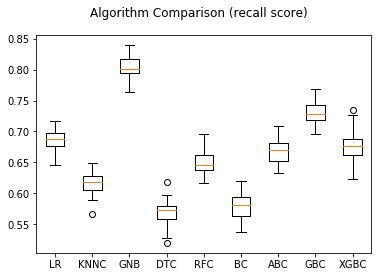

In [105]:
# algorithm comparison by recall score
fig = plt.figure()
fig.suptitle('Algorithm Comparison (recall score)')
ax = fig.add_subplot(111)
plt.boxplot(results_recall)
ax.set_xticklabels(names)
plt.show()

In [103]:
### training and validating using 'f1' as metric
names, results_f1 = cross_val_pipeline(models, X, y, scoring='f1')

f1 score of LR: 0.462757 (0.011581)
f1 score of KNNC: 0.478897 (0.013338)
f1 score of GNB: 0.305202 (0.005685)
f1 score of DTC: 0.469789 (0.012067)
f1 score of RFC: 0.558399 (0.010563)
f1 score of BC: 0.525561 (0.012408)
f1 score of ABC: 0.497699 (0.012708)
f1 score of GBC: 0.536120 (0.010776)
f1 score of XGBC: 0.580251 (0.015880)


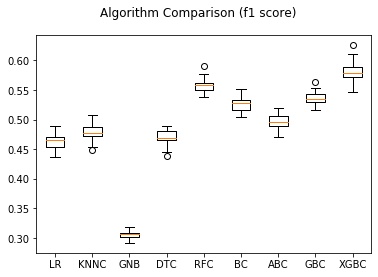

In [106]:
# algorithm comparison by f1 score
fig = plt.figure()
fig.suptitle('Algorithm Comparison (f1 score)')
ax = fig.add_subplot(111)
plt.boxplot(results_f1)
ax.set_xticklabels(names)
plt.show()

In [102]:
### training and validating using 'roc_auc' as metric
names, results_auc = cross_val_pipeline(models, X, y, scoring='roc_auc')

roc_auc score of LR: 0.841647 (0.007628)
roc_auc score of KNNC: 0.826359 (0.008920)
roc_auc score of GNB: 0.763005 (0.012354)
roc_auc score of DTC: 0.726834 (0.008776)
roc_auc score of RFC: 0.911173 (0.004631)
roc_auc score of BC: 0.884136 (0.004966)
roc_auc score of ABC: 0.865233 (0.006116)
roc_auc score of GBC: 0.893247 (0.005143)
roc_auc score of XGBC: 0.915591 (0.004857)


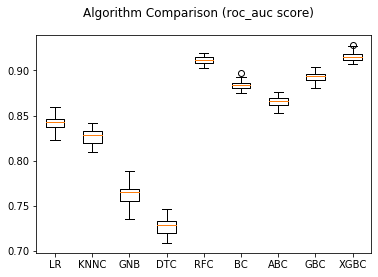

In [107]:
# algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison (roc_auc score)')
ax = fig.add_subplot(111)
plt.boxplot(results_auc)
ax.set_xticklabels(names)
plt.show()

### Checking with SVM

For SVM we use colab, since it requires much computational resource.

In [29]:
pipeline = imbpipeline(steps=[['smote', SMOTE(random_state=42)],
                              ['scaler', StandardScaler()],
                              ['model', SVC(probability=True)]])
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_result = cross_val_score(pipeline, X, y, scoring='recall', cv=kfold)
print(cv_result)
print('cv mean: %f  cv std: %f'%(cv_result.mean(), cv_result.std()))

In [ ]:
## result after running on colab

[0.68241966 0.66603595 0.67769376 0.68336484 0.6758034 ]
cv mean: 0.677064  cv std: 0.006197

From above checkings, XGBClassifier have overall better score in recall, roc_auc and f1. So we are choosing that algorithm for this problem.

## Choosing XGBClassifier

In [54]:
## fitting with prepared train data
model_xgbc = XGBClassifier(eval_metric='mlogloss')
model_xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Step 8: Hyperparameter tuning

Hyperparameter tuning of XGBClassifier model.

In [34]:
from sklearn.model_selection import RandomizedSearchCV

In [35]:
X_train_CV = X_train_raw.copy()
X_train_CV.drop('poutcome', axis=1, inplace=True)

In [36]:
y_train_CV = y_train_raw.copy()

In [37]:
params={
    'model__max_depth':[3,4,5,6],
    'model__learning_rate':[0.05,0.1,0.2],
    'model__n_estimators':[int(x) for x in np.linspace(start=200, stop=2000, num=10)],
    'model__verbosity':[1, 2, 3, 4], 
    'model__gamma':[0, 1, 2, 3, 4], 
    'model__min_child_weight':[1,2,3],
    'model__subsample':[0.5,0.7,1], 
    'model__colsample_bytree':[0.5,0.7,1]
}

#model = XGBClassifier(random_state=42)
pipeline = imbpipeline(steps=[['smote', SMOTE(random_state=42)],
                           ['scaler', StandardScaler()],
                           ['model', XGBClassifier(random_state=42)]])

xgb_cv= RandomizedSearchCV(pipeline, scoring='f1',param_distributions=params, n_iter=100, cv=4, 
                                random_state=42, n_jobs=-1)
                              
xgb_cv.fit(X_train_CV, y_train_CV) 

[10:34:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=4,
                   estimator=Pipeline(steps=[['smote', SMOTE(random_state=42)],
                                             ['scaler', StandardScaler()],
                                             ['model',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            colsample_bylevel=None,
                                                            colsample_bynode=None,
                                                            colsample_bytree=None,
                                                            enable_categorical=False,
                                                            gamma=None,
                                                            gpu_id=None,
                                                            importance_type=None,
                                                   

In [38]:
xgb_cv.best_params_

{'model__verbosity': 1,
 'model__subsample': 0.7,
 'model__n_estimators': 800,
 'model__min_child_weight': 3,
 'model__max_depth': 6,
 'model__learning_rate': 0.05,
 'model__gamma': 3,
 'model__colsample_bytree': 0.7}

In [39]:
xgb_cv.best_score_

0.5764188733189499

In [40]:
xgb_cv.best_estimator_

Pipeline(steps=[('smote', SMOTE(random_state=42)), ('scaler', StandardScaler()),
                ['model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.7, enable_categorical=False,
                               gamma=3, gpu_id=-1, importance_type=None,
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=3, missing=nan,
                               monotone_constraints='()', n_estimators=800,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=42, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=0.7,
                               tree_method='exact', validate_parameters=1,
                           

In [60]:
model_xgb_opt = XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.7, enable_categorical=False,
                               gamma=3, gpu_id=-1, importance_type=None,
                               interaction_constraints='', learning_rate=0.05,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=3,
                               monotone_constraints='()', n_estimators=800,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=42, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=0.7,
                               tree_method='exact', validate_parameters=1,
                               verbosity=1)
model_xgb_opt.fit(X_train, y_train)

[11:05:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=3, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=800, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.7, tree_method='exact', validate_parameters=1,
              verbosity=1)

# Step 9: Final model evaluation with test data

Model evaluation of optimized XGBClassifier model

In [42]:
#test_data = pd.read_csv('test_data.csv')
#test_data.head()

In [45]:
#test_temp = test_data.copy()

In [44]:
test_temp.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
22684,33,9,2,1,0,9,0,1,0,25,1,145,8,-1,0,3,0
30384,32,4,1,2,0,-149,0,0,0,5,3,93,1,8,1,1,0
10483,44,0,1,1,0,32,0,1,2,16,6,241,3,-1,0,3,0
8732,48,1,1,0,0,160,1,0,2,4,6,109,3,-1,0,3,0
21614,57,4,1,2,0,0,0,0,0,19,1,188,4,-1,0,3,0


## Preprocessing of test data set

In [46]:
## loading scaler object
ssc_file = 's_scaler.pkl'
with open(ssc_file, 'rb') as file:
    load_enc = pickle.load(file)
    
# transforming test input data based on fit parameters from train set fit 
test_temp.iloc[:, :-1] = load_enc.transform(test_temp.iloc[:, :-1])

In [44]:
test_temp.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,-0.727909,1.562880,1.534612,-0.206539,-0.104672,-0.479187,-0.798166,3.039172,-0.549223,1.233655,-1.448248,-0.667365,2.183102,-0.481496,-0.327232,0.544636,0
1,-0.819893,-0.100346,-0.129807,1.225143,-0.104672,-0.528077,-0.798166,-0.329037,-0.549223,-1.315986,-0.765883,-0.815757,-0.525749,-0.396855,0.109512,-1.396620,0
2,0.283910,-1.430926,-0.129807,-0.206539,-0.104672,-0.472070,-0.798166,3.039172,2.052778,0.086317,0.257665,-0.393409,0.248209,-0.481496,-0.327232,0.544636,0
3,0.651844,-1.098281,-0.129807,-1.638220,-0.104672,-0.432463,1.252872,-0.329037,2.052778,-1.443468,0.257665,-0.770098,0.248209,-0.481496,-0.327232,0.544636,0
4,1.479696,-0.100346,-0.129807,1.225143,-0.104672,-0.481972,-0.798166,-0.329037,-0.549223,0.468763,-1.448248,-0.544655,0.635188,-0.481496,-0.327232,0.544636,0


In [47]:
## droping feature 'poutcome'
test_temp.drop(columns='poutcome', axis=1, inplace=True)
test_temp.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
22684,-0.727909,1.562880,1.534612,-0.206539,-0.104672,-0.479187,-0.798166,3.039172,-0.549223,1.233655,-1.448248,-0.667365,2.183102,-0.481496,-0.327232,0
30384,-0.819893,-0.100346,-0.129807,1.225143,-0.104672,-0.528077,-0.798166,-0.329037,-0.549223,-1.315986,-0.765883,-0.815757,-0.525749,-0.396855,0.109512,0
10483,0.283910,-1.430926,-0.129807,-0.206539,-0.104672,-0.472070,-0.798166,3.039172,2.052778,0.086317,0.257665,-0.393409,0.248209,-0.481496,-0.327232,0
8732,0.651844,-1.098281,-0.129807,-1.638220,-0.104672,-0.432463,1.252872,-0.329037,2.052778,-1.443468,0.257665,-0.770098,0.248209,-0.481496,-0.327232,0
21614,1.479696,-0.100346,-0.129807,1.225143,-0.104672,-0.481972,-0.798166,-0.329037,-0.549223,0.468763,-1.448248,-0.544655,0.635188,-0.481496,-0.327232,0


In [48]:
test_df = test_temp.copy()

In [49]:
X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]

## Predicting with default model

In [55]:
y_pred_xgbc = model_xgbc.predict(X_test)

In [56]:
print(classification_report(y_test, y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      9981
           1       0.51      0.65      0.57      1322

    accuracy                           0.88     11303
   macro avg       0.73      0.78      0.75     11303
weighted avg       0.90      0.88      0.89     11303



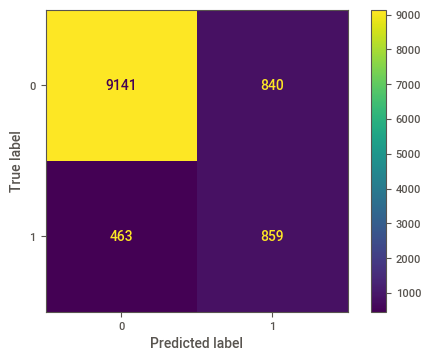

In [57]:
plot_confusion_matrix(model_xgbc, X_test, y_test)

## Predicting with optimizes model

In [50]:
y_pred_opt = model_xgb_opt.predict(X_test)
print(classification_report(y_test, y_pred_opt))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      9981
           1       0.51      0.64      0.57      1322

    accuracy                           0.89     11303
   macro avg       0.73      0.78      0.75     11303
weighted avg       0.90      0.89      0.89     11303



In [51]:
confusion_matrix(y_test, y_pred_opt)

array([[9172,  809],
       [ 471,  851]], dtype=int64)

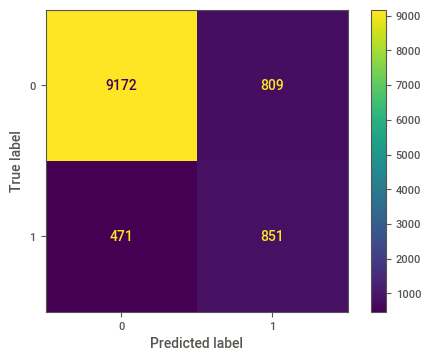

In [52]:
plot_confusion_matrix(model_xgb_opt, X_test, y_test)

Even after hyperparameter tuning it is found that default hyperparameter have decent recall and f1 scores comparitively, so we choose default XGBoost model for testing.

#### Let's try to find best threshold value for the classifier which yield best recall score.

In [61]:
## for getting probabilities of test record into class '1' (will 'subscribe')
y_pred_prob = model_xgbc.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred_prob)

0.9115057641288493

In [62]:
y_pred_prob[:10]

array([1.5636128e-03, 2.0723775e-02, 4.6677226e-03, 8.9565449e-04,
       1.1319169e-02, 9.6561140e-01, 1.2409661e-03, 4.1736499e-03,
       1.7872419e-04, 7.6921713e-01], dtype=float32)

In [63]:
y_pred_xgbc[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [65]:
def predict_with_thresh(model, X, threshold):
    y_pred_prob = model.predict_proba(X)[:, 1]
    return np.where(y_pred_prob>threshold, 1, 0)

In [66]:
for thr in np.arange(0, 1, 0.1):
    y_pred_thr = predict_with_thresh(model_xgbc, X_test, thr)
    print(confusion_matrix(y_test, y_pred_thr))
    recall = recall_score(y_test, y_pred_thr)
    acc = accuracy_score(y_test, y_pred_thr)
    print('Threshold :', thr, '\nRecall :', recall)
    print(classification_report(y_test, y_pred_thr))
    print('\n')

[[   0 9981]
 [   0 1322]]
Threshold : 0.0 
Recall : 1.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9981
           1       0.12      1.00      0.21      1322

    accuracy                           0.12     11303
   macro avg       0.06      0.50      0.10     11303
weighted avg       0.01      0.12      0.02     11303



[[7690 2291]
 [ 115 1207]]
Threshold : 0.1 
Recall : 0.9130105900151286
              precision    recall  f1-score   support

           0       0.99      0.77      0.86      9981
           1       0.35      0.91      0.50      1322

    accuracy                           0.79     11303
   macro avg       0.67      0.84      0.68     11303
weighted avg       0.91      0.79      0.82     11303



[[8323 1658]
 [ 187 1135]]
Threshold : 0.2 
Recall : 0.8585476550680786
              precision    recall  f1-score   support

           0       0.98      0.83      0.90      9981
           1       0.41      0.8

So inorder to minimize missclassification of records into class '0', threshold=0.3 could be better choice where recall score of about 79% for class '1' and have accuracy of 0.86. So it is a good model. One can choose threshold according to their business requirements.

In [58]:
## saving selected default XGB model
filename = 'xgbc_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model_xgbc, file)

# Conclusion

For predicting whether bank client subscribe a term deposit or not model 'model_xgbc' build on XGBClassifier algorithm is best. It has: 
- recall score (of 1): 65%
- precision score (of 1): 51%
- f1 score: 57%
- accuracy score: 88%

Through my findings, i come to know that my model has maximum performance compared to other available works in internet sources on this dataset.